# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/ input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


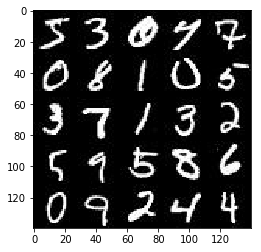

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

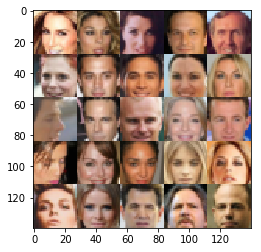

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0


C:\Users\sean.merrifield\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.
  


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [2]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_image = tf.placeholder(tf.float32, shape = (None, image_width, image_height, image_channels), name='input_image')
    input_z = tf.placeholder(tf.float32, shape = (None, z_dim), name='input_z')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')
       
    return input_image, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

NameError: name 'tf' is not defined

### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha = 0.2
    keep_prob = 0.8
    
    with tf.variable_scope('discriminator', reuse = reuse):
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2, name='layer2_relu')
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        
        flat = tf.reshape(relu3, (-1, 4*4*256), name='flatten')
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse= not is_train):
        alpha = 0.2
        x1 = tf.layers.dense(z, 7*7*512)
        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        x1 = tf.layers.batch_normalization(x1, training = is_train)
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training = is_train)
        x2 = tf.maximum(alpha * x2, x2)
        
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training = is_train)
        x3 = tf.maximum(alpha * x3, x3)
        
        logits = tf.layers.conv2d_transpose(x2, out_channel_dim, 5, strides=2, padding='same')
        
        out = tf.tanh(logits)
    
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    alpha = 0.2
    smooth = 0.1
    
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)*(1-smooth)), name='d_loss_real')
    
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)), name='d_loss_fake')

    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)), name='g_loss')
    
    d_loss = d_loss_real + d_loss_fake
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1, name='d_train_opt').minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1, name='g_train_opt').minimize(g_loss, var_list=g_vars)
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to  get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    
    #### Build Graph ####
    
    # Set image data
    if data_image_mode =="RGB":
        image_channels = 3 
    else:
        image_channels = 1
    image_width = data_shape[1]
    image_height = data_shape[2]
    
    #Inputs
    input_image, input_z, learning_rate_ = model_inputs(image_width, image_height, image_channels, z_dim)
    
    #Model Loss
    d_loss, g_loss = model_loss(input_image, input_z, image_channels)
    
    #Model Optimizer
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
      
    show_n = 25
    show_every = 100
    batch_i = 0
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
         
        filewriter = tf.summary.FileWriter('./logs/1', sess.graph)
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                batch_i += 1

                batch_images = batch_images * 2

                # TODO: Train Model
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                dis_loss, _ = sess.run([d_loss, d_train_opt], feed_dict={input_image: batch_images, input_z: batch_z, learning_rate_: learning_rate})
                gen_loss,_ = sess.run([g_loss, g_train_opt], feed_dict={input_image: batch_images, input_z: batch_z, learning_rate_: learning_rate})
                
                print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(dis_loss),
                          "Generator Loss: {:.4f}".format(gen_loss))
                
                if batch_i % show_every == 0:
                    show_generator_output(sess, show_n, input_z, image_channels, data_image_mode)
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 1.8855... Generator Loss: 8.5294
Epoch 1/2... Discriminator Loss: 17.5216... Generator Loss: 25.9082
Epoch 1/2... Discriminator Loss: 4.2131... Generator Loss: 11.9493
Epoch 1/2... Discriminator Loss: 4.4902... Generator Loss: 7.5382
Epoch 1/2... Discriminator Loss: 4.3590... Generator Loss: 2.4309
Epoch 1/2... Discriminator Loss: 5.9203... Generator Loss: 1.6932
Epoch 1/2... Discriminator Loss: 1.6662... Generator Loss: 6.3854
Epoch 1/2... Discriminator Loss: 1.8588... Generator Loss: 4.5779
Epoch 1/2... Discriminator Loss: 0.6101... Generator Loss: 3.9435
Epoch 1/2... Discriminator Loss: 0.8157... Generator Loss: 5.6905
Epoch 1/2... Discriminator Loss: 0.2088... Generator Loss: 5.7909
Epoch 1/2... Discriminator Loss: 0.4316... Generator Loss: 5.2486
Epoch 1/2... Discriminator Loss: 0.1863... Generator Loss: 4.6647
Epoch 1/2... Discriminator Loss: 0.1151... Generator Loss: 5.3614
Epoch 1/2... Discriminator Loss: 0.1757... Generator Loss: 4.5650
Epoch 1

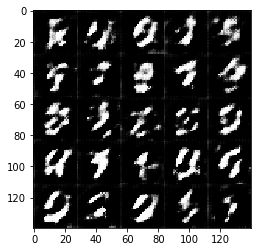

Epoch 1/2... Discriminator Loss: 1.6075... Generator Loss: 0.3666
Epoch 1/2... Discriminator Loss: 1.6947... Generator Loss: 4.3304
Epoch 1/2... Discriminator Loss: 1.6361... Generator Loss: 0.4992
Epoch 1/2... Discriminator Loss: 2.1640... Generator Loss: 3.1331
Epoch 1/2... Discriminator Loss: 1.3902... Generator Loss: 0.7750
Epoch 1/2... Discriminator Loss: 1.1035... Generator Loss: 2.2007
Epoch 1/2... Discriminator Loss: 1.1977... Generator Loss: 0.6206
Epoch 1/2... Discriminator Loss: 1.3937... Generator Loss: 4.1351
Epoch 1/2... Discriminator Loss: 2.5522... Generator Loss: 0.3121
Epoch 1/2... Discriminator Loss: 1.6757... Generator Loss: 3.9931
Epoch 1/2... Discriminator Loss: 1.6578... Generator Loss: 0.8885
Epoch 1/2... Discriminator Loss: 1.7660... Generator Loss: 4.6332
Epoch 1/2... Discriminator Loss: 1.1967... Generator Loss: 0.9091
Epoch 1/2... Discriminator Loss: 1.8662... Generator Loss: 1.9223
Epoch 1/2... Discriminator Loss: 1.2494... Generator Loss: 0.9950
Epoch 1/2.

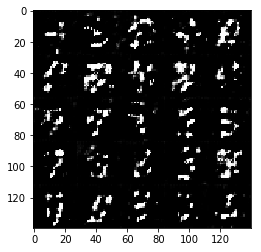

Epoch 1/2... Discriminator Loss: 1.2035... Generator Loss: 4.2765
Epoch 1/2... Discriminator Loss: 1.1166... Generator Loss: 1.9980
Epoch 1/2... Discriminator Loss: 2.2498... Generator Loss: 4.6794
Epoch 1/2... Discriminator Loss: 2.3604... Generator Loss: 0.8110
Epoch 1/2... Discriminator Loss: 2.5837... Generator Loss: 2.4566
Epoch 1/2... Discriminator Loss: 1.4273... Generator Loss: 1.3434
Epoch 1/2... Discriminator Loss: 1.1907... Generator Loss: 1.9518
Epoch 1/2... Discriminator Loss: 0.7925... Generator Loss: 1.9970
Epoch 1/2... Discriminator Loss: 1.1378... Generator Loss: 2.1786
Epoch 1/2... Discriminator Loss: 1.0508... Generator Loss: 2.6230
Epoch 1/2... Discriminator Loss: 1.4879... Generator Loss: 0.7365
Epoch 1/2... Discriminator Loss: 1.0780... Generator Loss: 2.5768
Epoch 1/2... Discriminator Loss: 0.9148... Generator Loss: 1.6101
Epoch 1/2... Discriminator Loss: 0.5401... Generator Loss: 2.4689
Epoch 1/2... Discriminator Loss: 0.8540... Generator Loss: 2.2880
Epoch 1/2.

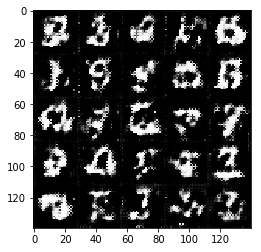

Epoch 1/2... Discriminator Loss: 1.5261... Generator Loss: 5.3250
Epoch 1/2... Discriminator Loss: 0.4705... Generator Loss: 3.4179
Epoch 1/2... Discriminator Loss: 0.3522... Generator Loss: 3.0667
Epoch 1/2... Discriminator Loss: 0.5750... Generator Loss: 4.8674
Epoch 1/2... Discriminator Loss: 0.7626... Generator Loss: 2.0480
Epoch 1/2... Discriminator Loss: 0.7685... Generator Loss: 3.4826
Epoch 1/2... Discriminator Loss: 0.3327... Generator Loss: 5.3174
Epoch 1/2... Discriminator Loss: 0.7773... Generator Loss: 1.7542
Epoch 1/2... Discriminator Loss: 0.5693... Generator Loss: 4.7584
Epoch 1/2... Discriminator Loss: 0.1190... Generator Loss: 4.9322
Epoch 1/2... Discriminator Loss: 0.3646... Generator Loss: 2.4451
Epoch 1/2... Discriminator Loss: 1.1318... Generator Loss: 6.2592
Epoch 1/2... Discriminator Loss: 0.7628... Generator Loss: 3.3202
Epoch 1/2... Discriminator Loss: 0.4131... Generator Loss: 1.3253
Epoch 1/2... Discriminator Loss: 1.6474... Generator Loss: 5.4575
Epoch 1/2.

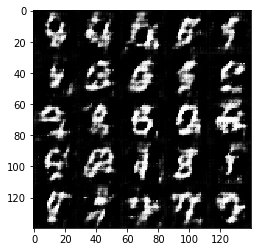

Epoch 1/2... Discriminator Loss: 0.7927... Generator Loss: 2.5404
Epoch 1/2... Discriminator Loss: 0.6562... Generator Loss: 2.1774
Epoch 1/2... Discriminator Loss: 1.1810... Generator Loss: 1.0095
Epoch 1/2... Discriminator Loss: 0.9039... Generator Loss: 3.8668
Epoch 1/2... Discriminator Loss: 0.9889... Generator Loss: 1.9171
Epoch 1/2... Discriminator Loss: 0.7618... Generator Loss: 2.3309
Epoch 1/2... Discriminator Loss: 1.4048... Generator Loss: 4.0525
Epoch 1/2... Discriminator Loss: 2.2916... Generator Loss: 0.3690
Epoch 1/2... Discriminator Loss: 2.0672... Generator Loss: 3.8595
Epoch 1/2... Discriminator Loss: 1.4030... Generator Loss: 1.7710
Epoch 1/2... Discriminator Loss: 1.0711... Generator Loss: 1.6809
Epoch 1/2... Discriminator Loss: 1.3229... Generator Loss: 2.5143
Epoch 1/2... Discriminator Loss: 1.1664... Generator Loss: 1.5090
Epoch 1/2... Discriminator Loss: 1.0194... Generator Loss: 0.9821
Epoch 1/2... Discriminator Loss: 1.2212... Generator Loss: 3.7297
Epoch 1/2.

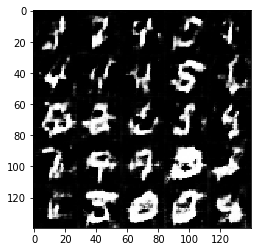

Epoch 1/2... Discriminator Loss: 0.8209... Generator Loss: 1.9924
Epoch 1/2... Discriminator Loss: 0.6059... Generator Loss: 2.1210
Epoch 1/2... Discriminator Loss: 0.5842... Generator Loss: 2.5088
Epoch 1/2... Discriminator Loss: 0.4090... Generator Loss: 2.9406
Epoch 1/2... Discriminator Loss: 0.4260... Generator Loss: 2.3568
Epoch 1/2... Discriminator Loss: 0.8299... Generator Loss: 1.1083
Epoch 1/2... Discriminator Loss: 1.6501... Generator Loss: 7.9595
Epoch 1/2... Discriminator Loss: 3.1764... Generator Loss: 2.1772
Epoch 1/2... Discriminator Loss: 1.9163... Generator Loss: 1.3435
Epoch 1/2... Discriminator Loss: 1.3206... Generator Loss: 3.4173
Epoch 1/2... Discriminator Loss: 1.4287... Generator Loss: 1.0145
Epoch 1/2... Discriminator Loss: 1.3662... Generator Loss: 1.9219
Epoch 1/2... Discriminator Loss: 0.7722... Generator Loss: 3.0990
Epoch 1/2... Discriminator Loss: 0.7957... Generator Loss: 1.7159
Epoch 1/2... Discriminator Loss: 0.6859... Generator Loss: 0.9005
Epoch 1/2.

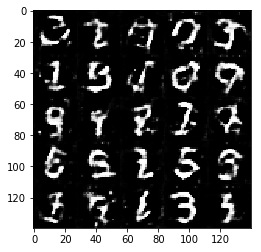

Epoch 1/2... Discriminator Loss: 0.6471... Generator Loss: 0.9425
Epoch 1/2... Discriminator Loss: 1.7473... Generator Loss: 7.9014
Epoch 1/2... Discriminator Loss: 3.1468... Generator Loss: 1.5645
Epoch 1/2... Discriminator Loss: 0.7224... Generator Loss: 1.0386
Epoch 1/2... Discriminator Loss: 0.8445... Generator Loss: 3.2289
Epoch 1/2... Discriminator Loss: 0.8746... Generator Loss: 2.8670
Epoch 1/2... Discriminator Loss: 0.7948... Generator Loss: 1.7685
Epoch 1/2... Discriminator Loss: 0.6932... Generator Loss: 1.5020
Epoch 1/2... Discriminator Loss: 0.9297... Generator Loss: 2.9927
Epoch 1/2... Discriminator Loss: 1.2409... Generator Loss: 1.0832
Epoch 1/2... Discriminator Loss: 0.8229... Generator Loss: 3.7475
Epoch 1/2... Discriminator Loss: 0.7548... Generator Loss: 2.9605
Epoch 1/2... Discriminator Loss: 0.9185... Generator Loss: 1.7065
Epoch 1/2... Discriminator Loss: 1.4035... Generator Loss: 5.0206
Epoch 1/2... Discriminator Loss: 2.0148... Generator Loss: 1.6919
Epoch 1/2.

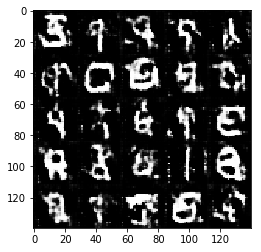

Epoch 1/2... Discriminator Loss: 0.9957... Generator Loss: 4.1236
Epoch 1/2... Discriminator Loss: 0.5282... Generator Loss: 2.6358
Epoch 1/2... Discriminator Loss: 0.5709... Generator Loss: 2.8456
Epoch 1/2... Discriminator Loss: 0.5852... Generator Loss: 3.1881
Epoch 1/2... Discriminator Loss: 0.4203... Generator Loss: 3.0441
Epoch 1/2... Discriminator Loss: 0.6147... Generator Loss: 1.6689
Epoch 1/2... Discriminator Loss: 1.4219... Generator Loss: 5.0989
Epoch 1/2... Discriminator Loss: 0.9628... Generator Loss: 2.0127
Epoch 1/2... Discriminator Loss: 0.9274... Generator Loss: 4.6427
Epoch 1/2... Discriminator Loss: 0.3675... Generator Loss: 4.2907
Epoch 1/2... Discriminator Loss: 1.1118... Generator Loss: 4.3391
Epoch 1/2... Discriminator Loss: 0.8757... Generator Loss: 0.7404
Epoch 1/2... Discriminator Loss: 1.1730... Generator Loss: 4.7539
Epoch 1/2... Discriminator Loss: 0.8309... Generator Loss: 3.1463
Epoch 1/2... Discriminator Loss: 0.6237... Generator Loss: 2.4940
Epoch 1/2.

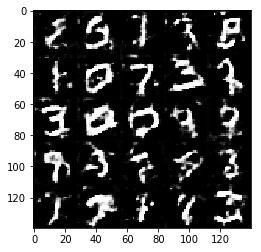

Epoch 1/2... Discriminator Loss: 0.6197... Generator Loss: 1.8718
Epoch 1/2... Discriminator Loss: 0.5076... Generator Loss: 3.5325
Epoch 1/2... Discriminator Loss: 0.2321... Generator Loss: 4.1875
Epoch 1/2... Discriminator Loss: 0.8690... Generator Loss: 1.4750
Epoch 1/2... Discriminator Loss: 0.6851... Generator Loss: 3.9526
Epoch 1/2... Discriminator Loss: 0.4365... Generator Loss: 5.5481
Epoch 1/2... Discriminator Loss: 0.3591... Generator Loss: 3.4923
Epoch 1/2... Discriminator Loss: 0.3432... Generator Loss: 3.5255
Epoch 1/2... Discriminator Loss: 0.8085... Generator Loss: 1.7532
Epoch 1/2... Discriminator Loss: 0.3797... Generator Loss: 3.9572
Epoch 1/2... Discriminator Loss: 0.6238... Generator Loss: 5.4587
Epoch 1/2... Discriminator Loss: 0.7538... Generator Loss: 1.8292
Epoch 1/2... Discriminator Loss: 1.1861... Generator Loss: 6.6194
Epoch 1/2... Discriminator Loss: 1.2163... Generator Loss: 1.7284
Epoch 1/2... Discriminator Loss: 0.5594... Generator Loss: 4.2144
Epoch 1/2.

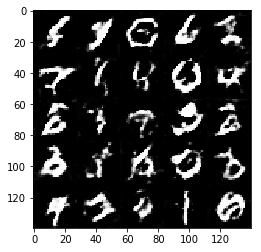

Epoch 1/2... Discriminator Loss: 0.6455... Generator Loss: 4.5000
Epoch 1/2... Discriminator Loss: 0.8532... Generator Loss: 1.8861
Epoch 1/2... Discriminator Loss: 0.6233... Generator Loss: 3.6580
Epoch 1/2... Discriminator Loss: 0.5162... Generator Loss: 4.7835
Epoch 1/2... Discriminator Loss: 1.5194... Generator Loss: 0.3431
Epoch 1/2... Discriminator Loss: 1.4602... Generator Loss: 4.9849
Epoch 1/2... Discriminator Loss: 1.0482... Generator Loss: 3.5526
Epoch 1/2... Discriminator Loss: 1.0595... Generator Loss: 1.6873
Epoch 1/2... Discriminator Loss: 1.2346... Generator Loss: 3.6999
Epoch 1/2... Discriminator Loss: 0.4401... Generator Loss: 3.7348
Epoch 1/2... Discriminator Loss: 1.6893... Generator Loss: 0.8140
Epoch 1/2... Discriminator Loss: 1.4927... Generator Loss: 3.6435
Epoch 1/2... Discriminator Loss: 0.1771... Generator Loss: 5.2765
Epoch 1/2... Discriminator Loss: 0.7923... Generator Loss: 2.0849
Epoch 1/2... Discriminator Loss: 0.5509... Generator Loss: 2.7155
Epoch 1/2.

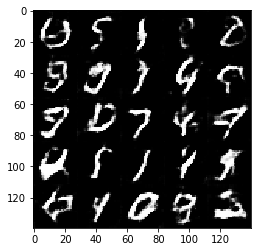

Epoch 1/2... Discriminator Loss: 0.5258... Generator Loss: 3.4446
Epoch 1/2... Discriminator Loss: 0.4324... Generator Loss: 2.0810
Epoch 1/2... Discriminator Loss: 0.5005... Generator Loss: 3.1218
Epoch 1/2... Discriminator Loss: 0.3870... Generator Loss: 4.8317
Epoch 1/2... Discriminator Loss: 0.6904... Generator Loss: 2.3444
Epoch 1/2... Discriminator Loss: 0.8468... Generator Loss: 6.6905
Epoch 1/2... Discriminator Loss: 1.0036... Generator Loss: 0.9174
Epoch 1/2... Discriminator Loss: 1.0270... Generator Loss: 5.6743
Epoch 1/2... Discriminator Loss: 0.6425... Generator Loss: 3.3093
Epoch 1/2... Discriminator Loss: 0.5193... Generator Loss: 5.1519
Epoch 1/2... Discriminator Loss: 0.4679... Generator Loss: 3.6958
Epoch 1/2... Discriminator Loss: 0.4696... Generator Loss: 3.7418
Epoch 1/2... Discriminator Loss: 0.1880... Generator Loss: 4.2790
Epoch 1/2... Discriminator Loss: 0.3525... Generator Loss: 3.9324
Epoch 1/2... Discriminator Loss: 0.3007... Generator Loss: 3.8349
Epoch 1/2.

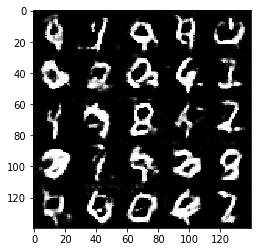

Epoch 1/2... Discriminator Loss: 0.0977... Generator Loss: 4.7257
Epoch 1/2... Discriminator Loss: 0.0229... Generator Loss: 6.6571
Epoch 1/2... Discriminator Loss: 0.0610... Generator Loss: 4.5328
Epoch 1/2... Discriminator Loss: 0.0690... Generator Loss: 5.5384
Epoch 1/2... Discriminator Loss: 0.0855... Generator Loss: 4.3821
Epoch 1/2... Discriminator Loss: 0.1824... Generator Loss: 4.0556
Epoch 1/2... Discriminator Loss: 0.0194... Generator Loss: 5.2117
Epoch 1/2... Discriminator Loss: 0.0362... Generator Loss: 4.7101
Epoch 1/2... Discriminator Loss: 0.1605... Generator Loss: 6.4701
Epoch 1/2... Discriminator Loss: 0.1720... Generator Loss: 4.4813
Epoch 1/2... Discriminator Loss: 0.1453... Generator Loss: 3.4199
Epoch 1/2... Discriminator Loss: 0.4372... Generator Loss: 7.6577
Epoch 1/2... Discriminator Loss: 1.0453... Generator Loss: 1.9988
Epoch 1/2... Discriminator Loss: 2.7423... Generator Loss: 13.0806
Epoch 1/2... Discriminator Loss: 5.1638... Generator Loss: 2.3260
Epoch 1/2

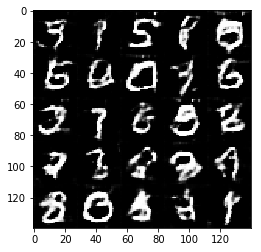

Epoch 1/2... Discriminator Loss: 0.3862... Generator Loss: 2.2661
Epoch 1/2... Discriminator Loss: 0.8197... Generator Loss: 3.9253
Epoch 1/2... Discriminator Loss: 0.3276... Generator Loss: 4.3558
Epoch 1/2... Discriminator Loss: 0.2233... Generator Loss: 4.3937
Epoch 1/2... Discriminator Loss: 0.1571... Generator Loss: 4.3554
Epoch 1/2... Discriminator Loss: 0.2366... Generator Loss: 2.8435
Epoch 1/2... Discriminator Loss: 0.2359... Generator Loss: 3.1430
Epoch 1/2... Discriminator Loss: 0.6027... Generator Loss: 6.7113
Epoch 1/2... Discriminator Loss: 1.2275... Generator Loss: 2.6586
Epoch 1/2... Discriminator Loss: 0.4042... Generator Loss: 3.7042
Epoch 1/2... Discriminator Loss: 0.2876... Generator Loss: 5.1019
Epoch 1/2... Discriminator Loss: 0.5503... Generator Loss: 2.5157
Epoch 1/2... Discriminator Loss: 0.9552... Generator Loss: 6.4571
Epoch 1/2... Discriminator Loss: 0.2902... Generator Loss: 5.1838
Epoch 1/2... Discriminator Loss: 0.4416... Generator Loss: 3.4842
Epoch 1/2.

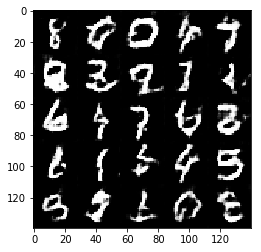

Epoch 1/2... Discriminator Loss: 0.1670... Generator Loss: 4.8289
Epoch 1/2... Discriminator Loss: 0.4095... Generator Loss: 3.4127
Epoch 1/2... Discriminator Loss: 0.1995... Generator Loss: 3.2100
Epoch 1/2... Discriminator Loss: 0.2996... Generator Loss: 4.8413
Epoch 1/2... Discriminator Loss: 0.1210... Generator Loss: 4.6896
Epoch 1/2... Discriminator Loss: 0.0980... Generator Loss: 4.5972
Epoch 1/2... Discriminator Loss: 0.1487... Generator Loss: 4.5994
Epoch 1/2... Discriminator Loss: 0.2577... Generator Loss: 3.8278
Epoch 1/2... Discriminator Loss: 0.1182... Generator Loss: 4.0081
Epoch 1/2... Discriminator Loss: 0.0497... Generator Loss: 5.3139
Epoch 1/2... Discriminator Loss: 0.2081... Generator Loss: 5.5567
Epoch 1/2... Discriminator Loss: 0.2571... Generator Loss: 3.1335
Epoch 1/2... Discriminator Loss: 0.2107... Generator Loss: 5.0902
Epoch 1/2... Discriminator Loss: 0.2263... Generator Loss: 5.5285
Epoch 1/2... Discriminator Loss: 0.1041... Generator Loss: 5.9630
Epoch 1/2.

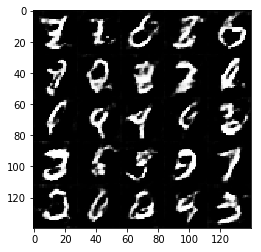

Epoch 1/2... Discriminator Loss: 0.0793... Generator Loss: 4.0681
Epoch 1/2... Discriminator Loss: 0.1670... Generator Loss: 4.4722
Epoch 1/2... Discriminator Loss: 0.9103... Generator Loss: 0.9727
Epoch 1/2... Discriminator Loss: 2.6167... Generator Loss: 9.9565
Epoch 1/2... Discriminator Loss: 3.7045... Generator Loss: 3.2509
Epoch 1/2... Discriminator Loss: 0.9855... Generator Loss: 3.2400
Epoch 1/2... Discriminator Loss: 0.2333... Generator Loss: 4.6097
Epoch 1/2... Discriminator Loss: 0.3289... Generator Loss: 4.9503
Epoch 1/2... Discriminator Loss: 0.2552... Generator Loss: 4.0738
Epoch 1/2... Discriminator Loss: 0.1551... Generator Loss: 3.7391
Epoch 1/2... Discriminator Loss: 0.3064... Generator Loss: 4.1284
Epoch 1/2... Discriminator Loss: 0.1007... Generator Loss: 5.0893
Epoch 1/2... Discriminator Loss: 0.2357... Generator Loss: 3.7556
Epoch 1/2... Discriminator Loss: 0.9397... Generator Loss: 0.9487
Epoch 1/2... Discriminator Loss: 2.1071... Generator Loss: 7.0343
Epoch 1/2.

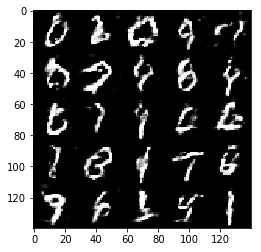

Epoch 1/2... Discriminator Loss: 0.6646... Generator Loss: 3.3019
Epoch 1/2... Discriminator Loss: 0.4760... Generator Loss: 5.1992
Epoch 1/2... Discriminator Loss: 0.3760... Generator Loss: 5.6539
Epoch 1/2... Discriminator Loss: 0.2736... Generator Loss: 3.8977
Epoch 1/2... Discriminator Loss: 0.6341... Generator Loss: 0.9438
Epoch 1/2... Discriminator Loss: 2.2274... Generator Loss: 11.9282
Epoch 1/2... Discriminator Loss: 2.4240... Generator Loss: 4.6932
Epoch 1/2... Discriminator Loss: 0.3084... Generator Loss: 1.5795
Epoch 1/2... Discriminator Loss: 0.3226... Generator Loss: 3.2487
Epoch 1/2... Discriminator Loss: 1.2360... Generator Loss: 7.6058
Epoch 1/2... Discriminator Loss: 1.2259... Generator Loss: 3.5422
Epoch 1/2... Discriminator Loss: 0.3024... Generator Loss: 1.9659
Epoch 1/2... Discriminator Loss: 1.9534... Generator Loss: 6.9298
Epoch 1/2... Discriminator Loss: 0.5666... Generator Loss: 7.1461
Epoch 1/2... Discriminator Loss: 0.0867... Generator Loss: 4.7370
Epoch 1/2

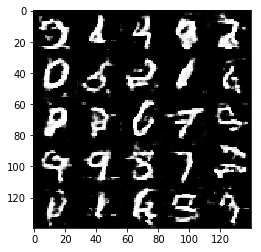

Epoch 1/2... Discriminator Loss: 0.1263... Generator Loss: 5.3105
Epoch 1/2... Discriminator Loss: 0.2083... Generator Loss: 3.8218
Epoch 1/2... Discriminator Loss: 0.1557... Generator Loss: 4.3583
Epoch 1/2... Discriminator Loss: 0.1413... Generator Loss: 5.6624
Epoch 1/2... Discriminator Loss: 0.1415... Generator Loss: 4.9513
Epoch 1/2... Discriminator Loss: 0.2022... Generator Loss: 3.5314
Epoch 1/2... Discriminator Loss: 0.4067... Generator Loss: 4.6684
Epoch 1/2... Discriminator Loss: 0.1772... Generator Loss: 3.9640
Epoch 1/2... Discriminator Loss: 0.0200... Generator Loss: 6.1026
Epoch 1/2... Discriminator Loss: 0.0486... Generator Loss: 7.0943
Epoch 1/2... Discriminator Loss: 0.0752... Generator Loss: 4.5253
Epoch 1/2... Discriminator Loss: 0.1728... Generator Loss: 4.0746
Epoch 1/2... Discriminator Loss: 0.0615... Generator Loss: 4.1048
Epoch 1/2... Discriminator Loss: 0.0274... Generator Loss: 5.5909
Epoch 1/2... Discriminator Loss: 0.0953... Generator Loss: 5.7854
Epoch 1/2.

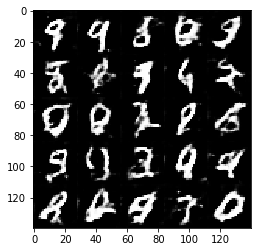

Epoch 1/2... Discriminator Loss: 0.0656... Generator Loss: 5.9222
Epoch 1/2... Discriminator Loss: 0.0247... Generator Loss: 6.2457
Epoch 1/2... Discriminator Loss: 0.1272... Generator Loss: 5.5548
Epoch 1/2... Discriminator Loss: 0.0570... Generator Loss: 8.6588
Epoch 1/2... Discriminator Loss: 0.0915... Generator Loss: 6.0823
Epoch 1/2... Discriminator Loss: 0.2502... Generator Loss: 3.2184
Epoch 1/2... Discriminator Loss: 0.1264... Generator Loss: 5.6101
Epoch 1/2... Discriminator Loss: 0.0149... Generator Loss: 6.8661
Epoch 1/2... Discriminator Loss: 0.3245... Generator Loss: 2.8007
Epoch 1/2... Discriminator Loss: 0.0475... Generator Loss: 4.2913
Epoch 1/2... Discriminator Loss: 0.2044... Generator Loss: 5.0678
Epoch 1/2... Discriminator Loss: 0.0836... Generator Loss: 5.1080
Epoch 1/2... Discriminator Loss: 0.0399... Generator Loss: 5.5250
Epoch 1/2... Discriminator Loss: 0.0345... Generator Loss: 5.7495
Epoch 1/2... Discriminator Loss: 0.1201... Generator Loss: 5.2735
Epoch 1/2.

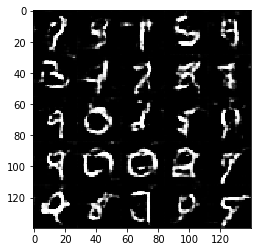

Epoch 1/2... Discriminator Loss: 0.0929... Generator Loss: 6.0516
Epoch 1/2... Discriminator Loss: 0.1202... Generator Loss: 7.9280
Epoch 1/2... Discriminator Loss: 0.0189... Generator Loss: 6.2644
Epoch 1/2... Discriminator Loss: 0.0172... Generator Loss: 5.8556
Epoch 1/2... Discriminator Loss: 0.0111... Generator Loss: 6.5814
Epoch 1/2... Discriminator Loss: 0.0234... Generator Loss: 6.0720
Epoch 1/2... Discriminator Loss: 0.0094... Generator Loss: 6.4368
Epoch 1/2... Discriminator Loss: 0.0270... Generator Loss: 5.4287
Epoch 1/2... Discriminator Loss: 0.0206... Generator Loss: 5.3732
Epoch 1/2... Discriminator Loss: 0.0668... Generator Loss: 5.9031
Epoch 1/2... Discriminator Loss: 0.0510... Generator Loss: 7.0189
Epoch 1/2... Discriminator Loss: 0.0209... Generator Loss: 6.7662
Epoch 1/2... Discriminator Loss: 0.0215... Generator Loss: 7.0405
Epoch 1/2... Discriminator Loss: 0.0471... Generator Loss: 6.6589
Epoch 1/2... Discriminator Loss: 0.1879... Generator Loss: 5.6448
Epoch 1/2.

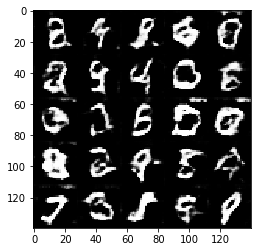

Epoch 1/2... Discriminator Loss: 0.1073... Generator Loss: 6.3446
Epoch 1/2... Discriminator Loss: 0.7104... Generator Loss: 3.2291
Epoch 1/2... Discriminator Loss: 1.8221... Generator Loss: 11.3342
Epoch 1/2... Discriminator Loss: 1.2820... Generator Loss: 5.5296
Epoch 1/2... Discriminator Loss: 0.7791... Generator Loss: 1.8488
Epoch 1/2... Discriminator Loss: 0.2589... Generator Loss: 4.0004
Epoch 1/2... Discriminator Loss: 0.5547... Generator Loss: 7.4147
Epoch 1/2... Discriminator Loss: 0.1364... Generator Loss: 5.1730
Epoch 1/2... Discriminator Loss: 0.2584... Generator Loss: 5.7015
Epoch 1/2... Discriminator Loss: 0.8048... Generator Loss: 8.8843
Epoch 1/2... Discriminator Loss: 0.2311... Generator Loss: 5.5498
Epoch 1/2... Discriminator Loss: 0.5963... Generator Loss: 1.1128
Epoch 1/2... Discriminator Loss: 1.5721... Generator Loss: 11.8079
Epoch 1/2... Discriminator Loss: 0.3425... Generator Loss: 10.8921
Epoch 1/2... Discriminator Loss: 0.1752... Generator Loss: 7.2528
Epoch 1

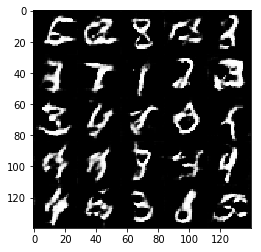

Epoch 1/2... Discriminator Loss: 0.0381... Generator Loss: 6.5973
Epoch 1/2... Discriminator Loss: 0.0592... Generator Loss: 6.5722
Epoch 1/2... Discriminator Loss: 0.0091... Generator Loss: 7.5569
Epoch 1/2... Discriminator Loss: 0.0454... Generator Loss: 6.4333
Epoch 1/2... Discriminator Loss: 0.0225... Generator Loss: 6.8533
Epoch 1/2... Discriminator Loss: 0.0087... Generator Loss: 7.2996
Epoch 1/2... Discriminator Loss: 0.0028... Generator Loss: 7.3869
Epoch 1/2... Discriminator Loss: 0.0096... Generator Loss: 8.0720
Epoch 1/2... Discriminator Loss: 0.0070... Generator Loss: 6.6046
Epoch 1/2... Discriminator Loss: 0.0059... Generator Loss: 6.3913
Epoch 1/2... Discriminator Loss: 0.0039... Generator Loss: 7.7559
Epoch 1/2... Discriminator Loss: 0.0014... Generator Loss: 8.1805
Epoch 1/2... Discriminator Loss: 0.0142... Generator Loss: 5.7315
Epoch 1/2... Discriminator Loss: 0.0054... Generator Loss: 7.6239
Epoch 1/2... Discriminator Loss: 0.0262... Generator Loss: 5.4148
Epoch 1/2.

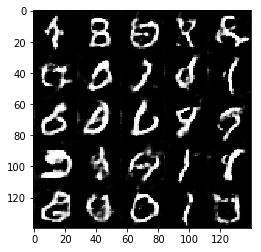

Epoch 1/2... Discriminator Loss: 0.1155... Generator Loss: 4.8421
Epoch 1/2... Discriminator Loss: 0.1691... Generator Loss: 4.3284
Epoch 1/2... Discriminator Loss: 0.0935... Generator Loss: 4.7951
Epoch 1/2... Discriminator Loss: 0.2460... Generator Loss: 5.2072
Epoch 1/2... Discriminator Loss: 0.8460... Generator Loss: 1.3143
Epoch 1/2... Discriminator Loss: 1.2990... Generator Loss: 6.6013
Epoch 1/2... Discriminator Loss: 0.1189... Generator Loss: 6.4041
Epoch 1/2... Discriminator Loss: 0.3174... Generator Loss: 4.4508
Epoch 1/2... Discriminator Loss: 0.5034... Generator Loss: 2.6441
Epoch 1/2... Discriminator Loss: 0.4082... Generator Loss: 3.6091
Epoch 1/2... Discriminator Loss: 0.1534... Generator Loss: 5.1481
Epoch 1/2... Discriminator Loss: 0.2930... Generator Loss: 5.8841
Epoch 1/2... Discriminator Loss: 0.1703... Generator Loss: 5.0383
Epoch 1/2... Discriminator Loss: 1.6900... Generator Loss: 0.7336
Epoch 1/2... Discriminator Loss: 1.9369... Generator Loss: 5.0445
Epoch 1/2.

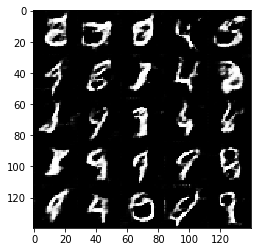

Epoch 1/2... Discriminator Loss: 0.0293... Generator Loss: 5.4197
Epoch 1/2... Discriminator Loss: 0.0669... Generator Loss: 4.9604
Epoch 1/2... Discriminator Loss: 0.0304... Generator Loss: 7.9720
Epoch 1/2... Discriminator Loss: 0.0114... Generator Loss: 5.5380
Epoch 1/2... Discriminator Loss: 0.0087... Generator Loss: 7.1356
Epoch 1/2... Discriminator Loss: 0.0067... Generator Loss: 6.7924
Epoch 1/2... Discriminator Loss: 0.0221... Generator Loss: 6.2745
Epoch 1/2... Discriminator Loss: 0.0224... Generator Loss: 6.1029
Epoch 1/2... Discriminator Loss: 0.0123... Generator Loss: 6.3885
Epoch 1/2... Discriminator Loss: 0.0033... Generator Loss: 7.6195
Epoch 1/2... Discriminator Loss: 0.0471... Generator Loss: 5.1955
Epoch 1/2... Discriminator Loss: 0.0703... Generator Loss: 6.9054
Epoch 1/2... Discriminator Loss: 0.0080... Generator Loss: 6.1225
Epoch 1/2... Discriminator Loss: 0.0181... Generator Loss: 5.4409
Epoch 1/2... Discriminator Loss: 0.0228... Generator Loss: 5.2797
Epoch 1/2.

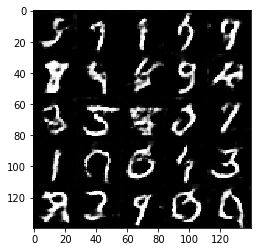

Epoch 1/2... Discriminator Loss: 0.1707... Generator Loss: 4.1895
Epoch 1/2... Discriminator Loss: 0.9024... Generator Loss: 1.2091
Epoch 1/2... Discriminator Loss: 0.2893... Generator Loss: 4.1049
Epoch 1/2... Discriminator Loss: 0.4575... Generator Loss: 6.1082
Epoch 1/2... Discriminator Loss: 0.6271... Generator Loss: 2.9044
Epoch 1/2... Discriminator Loss: 0.2009... Generator Loss: 2.9631
Epoch 1/2... Discriminator Loss: 0.2852... Generator Loss: 5.0386
Epoch 1/2... Discriminator Loss: 0.1200... Generator Loss: 5.7176
Epoch 1/2... Discriminator Loss: 0.5130... Generator Loss: 2.3882
Epoch 1/2... Discriminator Loss: 0.7647... Generator Loss: 6.4543
Epoch 1/2... Discriminator Loss: 0.1420... Generator Loss: 6.3685
Epoch 1/2... Discriminator Loss: 1.0860... Generator Loss: 0.9422
Epoch 1/2... Discriminator Loss: 0.8592... Generator Loss: 5.8613
Epoch 1/2... Discriminator Loss: 0.0848... Generator Loss: 6.3089
Epoch 1/2... Discriminator Loss: 0.7687... Generator Loss: 2.2503
Epoch 1/2.

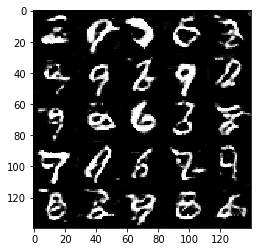

Epoch 1/2... Discriminator Loss: 0.0120... Generator Loss: 6.1949
Epoch 1/2... Discriminator Loss: 0.0074... Generator Loss: 6.2007
Epoch 1/2... Discriminator Loss: 0.0129... Generator Loss: 9.3415
Epoch 1/2... Discriminator Loss: 0.0532... Generator Loss: 5.5268
Epoch 1/2... Discriminator Loss: 0.1425... Generator Loss: 5.9227
Epoch 1/2... Discriminator Loss: 0.0348... Generator Loss: 8.7533
Epoch 1/2... Discriminator Loss: 0.0020... Generator Loss: 7.8737
Epoch 1/2... Discriminator Loss: 0.0261... Generator Loss: 5.6881
Epoch 1/2... Discriminator Loss: 0.0092... Generator Loss: 6.8861
Epoch 1/2... Discriminator Loss: 0.0073... Generator Loss: 6.2798
Epoch 1/2... Discriminator Loss: 0.0154... Generator Loss: 6.1876
Epoch 1/2... Discriminator Loss: 0.0088... Generator Loss: 6.0637
Epoch 1/2... Discriminator Loss: 0.0036... Generator Loss: 7.4542
Epoch 1/2... Discriminator Loss: 0.0300... Generator Loss: 5.8552
Epoch 1/2... Discriminator Loss: 0.1818... Generator Loss: 6.4357
Epoch 1/2.

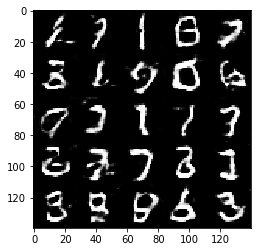

Epoch 1/2... Discriminator Loss: 0.7522... Generator Loss: 7.9276
Epoch 1/2... Discriminator Loss: 1.3155... Generator Loss: 1.4550
Epoch 1/2... Discriminator Loss: 1.7222... Generator Loss: 7.3413
Epoch 1/2... Discriminator Loss: 1.8413... Generator Loss: 4.3746
Epoch 1/2... Discriminator Loss: 0.3591... Generator Loss: 4.3942
Epoch 1/2... Discriminator Loss: 0.1645... Generator Loss: 4.6970
Epoch 1/2... Discriminator Loss: 0.4107... Generator Loss: 4.2167
Epoch 1/2... Discriminator Loss: 0.2319... Generator Loss: 5.7144
Epoch 1/2... Discriminator Loss: 1.1198... Generator Loss: 1.1836
Epoch 1/2... Discriminator Loss: 1.8122... Generator Loss: 7.4279
Epoch 1/2... Discriminator Loss: 0.5588... Generator Loss: 4.6762
Epoch 1/2... Discriminator Loss: 0.4055... Generator Loss: 2.8969
Epoch 1/2... Discriminator Loss: 0.1400... Generator Loss: 4.2719
Epoch 1/2... Discriminator Loss: 0.0928... Generator Loss: 4.2499
Epoch 1/2... Discriminator Loss: 0.5445... Generator Loss: 6.7916
Epoch 1/2.

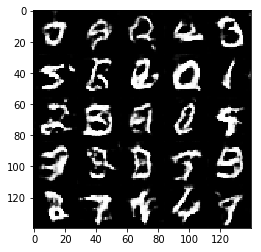

Epoch 1/2... Discriminator Loss: 0.0870... Generator Loss: 4.8443
Epoch 1/2... Discriminator Loss: 0.0243... Generator Loss: 4.7613
Epoch 1/2... Discriminator Loss: 0.0217... Generator Loss: 5.7576
Epoch 1/2... Discriminator Loss: 0.1119... Generator Loss: 5.3315
Epoch 1/2... Discriminator Loss: 0.0364... Generator Loss: 6.5389
Epoch 1/2... Discriminator Loss: 0.0419... Generator Loss: 6.3150
Epoch 1/2... Discriminator Loss: 0.0659... Generator Loss: 5.1814
Epoch 1/2... Discriminator Loss: 0.0358... Generator Loss: 4.4177
Epoch 1/2... Discriminator Loss: 0.1180... Generator Loss: 4.1721
Epoch 1/2... Discriminator Loss: 0.0265... Generator Loss: 5.6753
Epoch 1/2... Discriminator Loss: 0.0330... Generator Loss: 7.6715
Epoch 1/2... Discriminator Loss: 0.2186... Generator Loss: 5.9215
Epoch 1/2... Discriminator Loss: 0.1107... Generator Loss: 6.9047
Epoch 1/2... Discriminator Loss: 0.1675... Generator Loss: 3.9955
Epoch 1/2... Discriminator Loss: 0.0443... Generator Loss: 5.0255
Epoch 1/2.

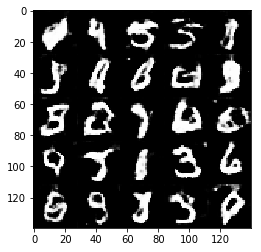

Epoch 1/2... Discriminator Loss: 0.0056... Generator Loss: 7.4210
Epoch 1/2... Discriminator Loss: 0.0070... Generator Loss: 7.3055
Epoch 1/2... Discriminator Loss: 0.0030... Generator Loss: 10.8744
Epoch 1/2... Discriminator Loss: 0.1361... Generator Loss: 6.7035
Epoch 1/2... Discriminator Loss: 0.1483... Generator Loss: 7.2215
Epoch 1/2... Discriminator Loss: 0.0408... Generator Loss: 7.9433
Epoch 1/2... Discriminator Loss: 0.2446... Generator Loss: 3.9481
Epoch 1/2... Discriminator Loss: 0.2801... Generator Loss: 6.9498
Epoch 1/2... Discriminator Loss: 0.2205... Generator Loss: 3.7624
Epoch 1/2... Discriminator Loss: 0.3511... Generator Loss: 10.2574
Epoch 1/2... Discriminator Loss: 0.0289... Generator Loss: 10.5454
Epoch 1/2... Discriminator Loss: 0.2184... Generator Loss: 8.5536
Epoch 1/2... Discriminator Loss: 0.0881... Generator Loss: 3.6583
Epoch 1/2... Discriminator Loss: 0.1315... Generator Loss: 5.9208
Epoch 1/2... Discriminator Loss: 0.0954... Generator Loss: 6.2165
Epoch 1

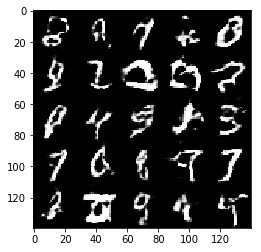

Epoch 1/2... Discriminator Loss: 0.0233... Generator Loss: 5.4716
Epoch 1/2... Discriminator Loss: 0.0111... Generator Loss: 6.0840
Epoch 1/2... Discriminator Loss: 0.0196... Generator Loss: 5.8354
Epoch 1/2... Discriminator Loss: 0.0617... Generator Loss: 6.0384
Epoch 1/2... Discriminator Loss: 0.1409... Generator Loss: 7.0638
Epoch 1/2... Discriminator Loss: 0.0098... Generator Loss: 5.4789
Epoch 1/2... Discriminator Loss: 0.0775... Generator Loss: 6.4802
Epoch 1/2... Discriminator Loss: 0.0706... Generator Loss: 6.9853
Epoch 1/2... Discriminator Loss: 0.0875... Generator Loss: 4.4687
Epoch 1/2... Discriminator Loss: 0.0167... Generator Loss: 7.3684
Epoch 1/2... Discriminator Loss: 0.0086... Generator Loss: 8.0271
Epoch 1/2... Discriminator Loss: 0.2871... Generator Loss: 8.8763
Epoch 1/2... Discriminator Loss: 0.1317... Generator Loss: 9.3749
Epoch 1/2... Discriminator Loss: 0.3061... Generator Loss: 7.5393
Epoch 1/2... Discriminator Loss: 0.0331... Generator Loss: 8.1272
Epoch 1/2.

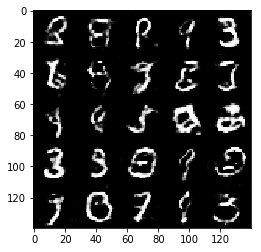

Epoch 1/2... Discriminator Loss: 0.1152... Generator Loss: 7.0076
Epoch 1/2... Discriminator Loss: 0.1410... Generator Loss: 6.6572
Epoch 1/2... Discriminator Loss: 0.1501... Generator Loss: 5.7039
Epoch 1/2... Discriminator Loss: 0.0766... Generator Loss: 7.4736
Epoch 1/2... Discriminator Loss: 0.0332... Generator Loss: 10.1850
Epoch 1/2... Discriminator Loss: 0.3259... Generator Loss: 4.5873
Epoch 1/2... Discriminator Loss: 0.0762... Generator Loss: 4.7500
Epoch 1/2... Discriminator Loss: 0.0260... Generator Loss: 5.1784
Epoch 1/2... Discriminator Loss: 0.3748... Generator Loss: 8.5896
Epoch 1/2... Discriminator Loss: 0.0530... Generator Loss: 10.8849
Epoch 1/2... Discriminator Loss: 0.2526... Generator Loss: 7.1474
Epoch 1/2... Discriminator Loss: 0.0275... Generator Loss: 4.2554
Epoch 1/2... Discriminator Loss: 0.6158... Generator Loss: 8.5923
Epoch 1/2... Discriminator Loss: 0.8403... Generator Loss: 5.6224
Epoch 1/2... Discriminator Loss: 0.0149... Generator Loss: 4.7852
Epoch 1/

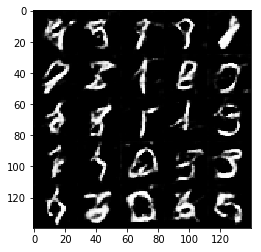

Epoch 1/2... Discriminator Loss: 2.3166... Generator Loss: 0.4915
Epoch 1/2... Discriminator Loss: 1.4405... Generator Loss: 6.4043
Epoch 1/2... Discriminator Loss: 0.4613... Generator Loss: 6.5026
Epoch 1/2... Discriminator Loss: 0.4576... Generator Loss: 6.3274
Epoch 1/2... Discriminator Loss: 0.2312... Generator Loss: 6.0813
Epoch 1/2... Discriminator Loss: 0.3422... Generator Loss: 3.7029
Epoch 1/2... Discriminator Loss: 0.4261... Generator Loss: 4.9210
Epoch 1/2... Discriminator Loss: 0.9691... Generator Loss: 2.6273
Epoch 1/2... Discriminator Loss: 0.2887... Generator Loss: 2.7332
Epoch 1/2... Discriminator Loss: 0.4907... Generator Loss: 5.5048
Epoch 1/2... Discriminator Loss: 0.0806... Generator Loss: 5.9719
Epoch 1/2... Discriminator Loss: 0.1774... Generator Loss: 6.7334
Epoch 1/2... Discriminator Loss: 0.6511... Generator Loss: 4.9785
Epoch 1/2... Discriminator Loss: 0.8421... Generator Loss: 4.8511
Epoch 1/2... Discriminator Loss: 0.5960... Generator Loss: 3.9436
Epoch 1/2.

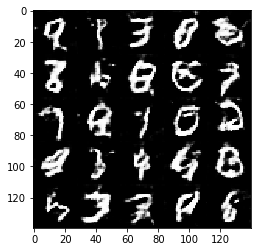

Epoch 1/2... Discriminator Loss: 0.0116... Generator Loss: 5.9133
Epoch 1/2... Discriminator Loss: 0.0860... Generator Loss: 4.9745
Epoch 1/2... Discriminator Loss: 0.0030... Generator Loss: 8.3240
Epoch 1/2... Discriminator Loss: 0.0304... Generator Loss: 5.0702
Epoch 1/2... Discriminator Loss: 0.0450... Generator Loss: 4.5771
Epoch 1/2... Discriminator Loss: 0.0318... Generator Loss: 6.4730
Epoch 1/2... Discriminator Loss: 0.0337... Generator Loss: 6.9332
Epoch 1/2... Discriminator Loss: 0.0442... Generator Loss: 6.3637
Epoch 1/2... Discriminator Loss: 0.0263... Generator Loss: 4.7675
Epoch 1/2... Discriminator Loss: 0.0502... Generator Loss: 5.5165
Epoch 1/2... Discriminator Loss: 0.0096... Generator Loss: 8.2901
Epoch 1/2... Discriminator Loss: 0.0157... Generator Loss: 5.6908
Epoch 1/2... Discriminator Loss: 0.0036... Generator Loss: 6.9729
Epoch 1/2... Discriminator Loss: 0.0080... Generator Loss: 7.0121
Epoch 1/2... Discriminator Loss: 0.0598... Generator Loss: 5.0886
Epoch 1/2.

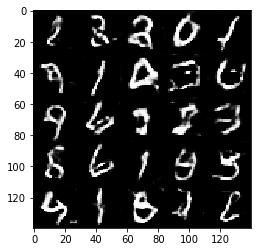

Epoch 1/2... Discriminator Loss: 0.1868... Generator Loss: 6.3723
Epoch 1/2... Discriminator Loss: 0.0129... Generator Loss: 6.6681
Epoch 1/2... Discriminator Loss: 0.0467... Generator Loss: 6.7146
Epoch 1/2... Discriminator Loss: 0.0215... Generator Loss: 6.0024
Epoch 1/2... Discriminator Loss: 0.0895... Generator Loss: 6.4194
Epoch 1/2... Discriminator Loss: 0.0982... Generator Loss: 4.7462
Epoch 1/2... Discriminator Loss: 0.0938... Generator Loss: 4.4421
Epoch 1/2... Discriminator Loss: 0.0450... Generator Loss: 5.2879
Epoch 1/2... Discriminator Loss: 0.7876... Generator Loss: 9.1308
Epoch 1/2... Discriminator Loss: 1.4500... Generator Loss: 5.2495
Epoch 1/2... Discriminator Loss: 0.8639... Generator Loss: 0.2793
Epoch 1/2... Discriminator Loss: 2.9631... Generator Loss: 9.3127
Epoch 1/2... Discriminator Loss: 0.3355... Generator Loss: 8.1762
Epoch 1/2... Discriminator Loss: 0.9334... Generator Loss: 2.5364
Epoch 1/2... Discriminator Loss: 0.8167... Generator Loss: 5.7799
Epoch 1/2.

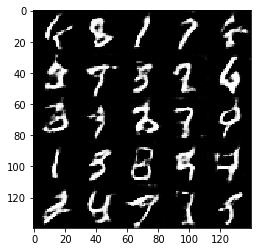

Epoch 1/2... Discriminator Loss: 0.0174... Generator Loss: 8.7310
Epoch 1/2... Discriminator Loss: 0.0206... Generator Loss: 6.7612
Epoch 1/2... Discriminator Loss: 0.0206... Generator Loss: 6.0281
Epoch 1/2... Discriminator Loss: 0.0188... Generator Loss: 6.1114
Epoch 1/2... Discriminator Loss: 0.0765... Generator Loss: 5.3914
Epoch 1/2... Discriminator Loss: 0.0414... Generator Loss: 6.7436
Epoch 1/2... Discriminator Loss: 0.0251... Generator Loss: 6.2234
Epoch 1/2... Discriminator Loss: 0.0156... Generator Loss: 6.6916
Epoch 1/2... Discriminator Loss: 0.0502... Generator Loss: 5.6688
Epoch 1/2... Discriminator Loss: 0.0089... Generator Loss: 5.6200
Epoch 1/2... Discriminator Loss: 0.0186... Generator Loss: 5.1660
Epoch 1/2... Discriminator Loss: 0.0423... Generator Loss: 5.9497
Epoch 1/2... Discriminator Loss: 0.0041... Generator Loss: 8.9113
Epoch 1/2... Discriminator Loss: 0.1751... Generator Loss: 5.4371
Epoch 1/2... Discriminator Loss: 0.0248... Generator Loss: 5.0808
Epoch 1/2.

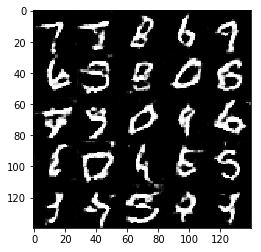

Epoch 1/2... Discriminator Loss: 0.0334... Generator Loss: 6.7714
Epoch 1/2... Discriminator Loss: 0.1658... Generator Loss: 5.9899
Epoch 1/2... Discriminator Loss: 0.1732... Generator Loss: 6.4053
Epoch 1/2... Discriminator Loss: 0.0081... Generator Loss: 6.6212
Epoch 1/2... Discriminator Loss: 0.0180... Generator Loss: 7.2591
Epoch 1/2... Discriminator Loss: 0.0523... Generator Loss: 7.2177
Epoch 1/2... Discriminator Loss: 0.1691... Generator Loss: 5.8705
Epoch 1/2... Discriminator Loss: 0.1145... Generator Loss: 6.6854
Epoch 1/2... Discriminator Loss: 0.0462... Generator Loss: 5.8792
Epoch 1/2... Discriminator Loss: 0.0288... Generator Loss: 5.3805
Epoch 1/2... Discriminator Loss: 0.0103... Generator Loss: 6.3515
Epoch 1/2... Discriminator Loss: 0.0027... Generator Loss: 7.1574
Epoch 1/2... Discriminator Loss: 0.0262... Generator Loss: 5.5614
Epoch 1/2... Discriminator Loss: 0.0256... Generator Loss: 6.0065
Epoch 1/2... Discriminator Loss: 0.0068... Generator Loss: 7.6238
Epoch 1/2.

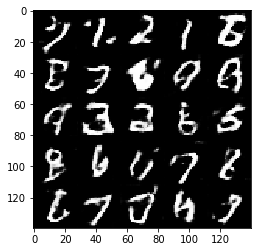

Epoch 1/2... Discriminator Loss: 0.0205... Generator Loss: 6.1869
Epoch 1/2... Discriminator Loss: 0.0323... Generator Loss: 5.1471
Epoch 1/2... Discriminator Loss: 0.2718... Generator Loss: 5.3846
Epoch 1/2... Discriminator Loss: 0.0739... Generator Loss: 5.1655
Epoch 1/2... Discriminator Loss: 0.0256... Generator Loss: 5.4264
Epoch 1/2... Discriminator Loss: 0.0305... Generator Loss: 5.1326
Epoch 1/2... Discriminator Loss: 0.1370... Generator Loss: 4.3530
Epoch 1/2... Discriminator Loss: 0.0917... Generator Loss: 4.3604
Epoch 1/2... Discriminator Loss: 0.0481... Generator Loss: 4.9441
Epoch 1/2... Discriminator Loss: 0.0117... Generator Loss: 6.2333
Epoch 1/2... Discriminator Loss: 0.0229... Generator Loss: 6.0808
Epoch 1/2... Discriminator Loss: 0.0251... Generator Loss: 6.2108
Epoch 1/2... Discriminator Loss: 0.0588... Generator Loss: 4.9587
Epoch 1/2... Discriminator Loss: 0.1527... Generator Loss: 4.1672
Epoch 1/2... Discriminator Loss: 0.2452... Generator Loss: 3.8929
Epoch 1/2.

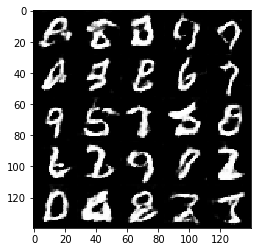

Epoch 1/2... Discriminator Loss: 0.1256... Generator Loss: 6.1850
Epoch 1/2... Discriminator Loss: 0.0223... Generator Loss: 7.0545
Epoch 1/2... Discriminator Loss: 0.1288... Generator Loss: 4.7406
Epoch 1/2... Discriminator Loss: 0.0602... Generator Loss: 6.5916
Epoch 1/2... Discriminator Loss: 0.0170... Generator Loss: 7.4719
Epoch 1/2... Discriminator Loss: 0.0215... Generator Loss: 5.2686
Epoch 1/2... Discriminator Loss: 0.0440... Generator Loss: 5.2999
Epoch 1/2... Discriminator Loss: 0.0268... Generator Loss: 6.2514
Epoch 1/2... Discriminator Loss: 0.0544... Generator Loss: 5.0283
Epoch 1/2... Discriminator Loss: 0.0521... Generator Loss: 5.3237
Epoch 1/2... Discriminator Loss: 0.0472... Generator Loss: 5.9622
Epoch 1/2... Discriminator Loss: 0.0257... Generator Loss: 5.1630
Epoch 1/2... Discriminator Loss: 0.0091... Generator Loss: 6.3449
Epoch 1/2... Discriminator Loss: 0.0349... Generator Loss: 5.9868
Epoch 1/2... Discriminator Loss: 0.0160... Generator Loss: 5.9634
Epoch 1/2.

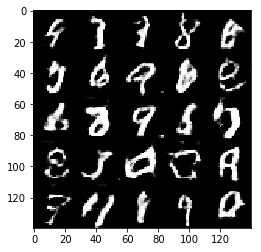

Epoch 1/2... Discriminator Loss: 0.0429... Generator Loss: 6.6160
Epoch 1/2... Discriminator Loss: 0.0258... Generator Loss: 5.4134
Epoch 1/2... Discriminator Loss: 0.0013... Generator Loss: 7.9315
Epoch 1/2... Discriminator Loss: 0.0029... Generator Loss: 7.1811
Epoch 1/2... Discriminator Loss: 0.0125... Generator Loss: 6.5034
Epoch 1/2... Discriminator Loss: 0.0373... Generator Loss: 5.6798
Epoch 1/2... Discriminator Loss: 0.0033... Generator Loss: 7.8848
Epoch 1/2... Discriminator Loss: 0.0092... Generator Loss: 5.8274
Epoch 1/2... Discriminator Loss: 0.0027... Generator Loss: 7.4671
Epoch 1/2... Discriminator Loss: 0.0166... Generator Loss: 6.2492
Epoch 1/2... Discriminator Loss: 0.0239... Generator Loss: 7.1524
Epoch 1/2... Discriminator Loss: 0.0522... Generator Loss: 5.9052
Epoch 1/2... Discriminator Loss: 0.0034... Generator Loss: 6.8050
Epoch 1/2... Discriminator Loss: 0.1336... Generator Loss: 6.4140
Epoch 1/2... Discriminator Loss: 0.0572... Generator Loss: 6.2729
Epoch 1/2.

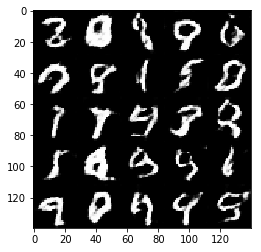

Epoch 2/2... Discriminator Loss: 0.0042... Generator Loss: 7.4663
Epoch 2/2... Discriminator Loss: 0.0326... Generator Loss: 6.5672
Epoch 2/2... Discriminator Loss: 0.0595... Generator Loss: 5.9643
Epoch 2/2... Discriminator Loss: 0.0217... Generator Loss: 5.4499
Epoch 2/2... Discriminator Loss: 0.0195... Generator Loss: 5.7416
Epoch 2/2... Discriminator Loss: 0.1642... Generator Loss: 4.6643
Epoch 2/2... Discriminator Loss: 0.0409... Generator Loss: 5.8753
Epoch 2/2... Discriminator Loss: 0.5163... Generator Loss: 11.0061
Epoch 2/2... Discriminator Loss: 2.3045... Generator Loss: 0.0905
Epoch 2/2... Discriminator Loss: 3.0117... Generator Loss: 15.1600
Epoch 2/2... Discriminator Loss: 1.2444... Generator Loss: 3.4365
Epoch 2/2... Discriminator Loss: 0.2243... Generator Loss: 3.4194
Epoch 2/2... Discriminator Loss: 0.0568... Generator Loss: 5.3498
Epoch 2/2... Discriminator Loss: 0.0878... Generator Loss: 5.3865
Epoch 2/2... Discriminator Loss: 0.1525... Generator Loss: 5.6190
Epoch 2/

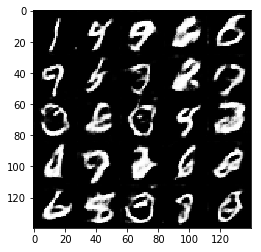

Epoch 2/2... Discriminator Loss: 0.8579... Generator Loss: 2.7822
Epoch 2/2... Discriminator Loss: 0.1974... Generator Loss: 4.1165
Epoch 2/2... Discriminator Loss: 0.1359... Generator Loss: 5.5492
Epoch 2/2... Discriminator Loss: 0.1173... Generator Loss: 4.8626
Epoch 2/2... Discriminator Loss: 0.0567... Generator Loss: 4.0725
Epoch 2/2... Discriminator Loss: 0.0371... Generator Loss: 4.4331
Epoch 2/2... Discriminator Loss: 0.1943... Generator Loss: 5.2313
Epoch 2/2... Discriminator Loss: 0.1562... Generator Loss: 5.3351
Epoch 2/2... Discriminator Loss: 0.0404... Generator Loss: 4.6227
Epoch 2/2... Discriminator Loss: 0.1586... Generator Loss: 4.9032
Epoch 2/2... Discriminator Loss: 0.1983... Generator Loss: 4.6411
Epoch 2/2... Discriminator Loss: 0.0699... Generator Loss: 4.8396
Epoch 2/2... Discriminator Loss: 0.1088... Generator Loss: 5.3055
Epoch 2/2... Discriminator Loss: 0.0121... Generator Loss: 6.0260
Epoch 2/2... Discriminator Loss: 0.1191... Generator Loss: 4.8453
Epoch 2/2.

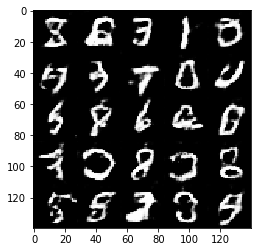

Epoch 2/2... Discriminator Loss: 0.0346... Generator Loss: 6.3939
Epoch 2/2... Discriminator Loss: 0.0376... Generator Loss: 6.1168
Epoch 2/2... Discriminator Loss: 0.0439... Generator Loss: 6.2917
Epoch 2/2... Discriminator Loss: 0.1155... Generator Loss: 4.3410
Epoch 2/2... Discriminator Loss: 0.2571... Generator Loss: 6.7570
Epoch 2/2... Discriminator Loss: 0.1738... Generator Loss: 4.7685
Epoch 2/2... Discriminator Loss: 0.0247... Generator Loss: 5.4403
Epoch 2/2... Discriminator Loss: 0.0687... Generator Loss: 5.2339
Epoch 2/2... Discriminator Loss: 0.0266... Generator Loss: 5.0691
Epoch 2/2... Discriminator Loss: 0.2067... Generator Loss: 5.8720
Epoch 2/2... Discriminator Loss: 0.0334... Generator Loss: 7.8128
Epoch 2/2... Discriminator Loss: 0.0238... Generator Loss: 8.3337
Epoch 2/2... Discriminator Loss: 0.2243... Generator Loss: 4.5384
Epoch 2/2... Discriminator Loss: 0.0328... Generator Loss: 4.4942
Epoch 2/2... Discriminator Loss: 0.0976... Generator Loss: 4.9973
Epoch 2/2.

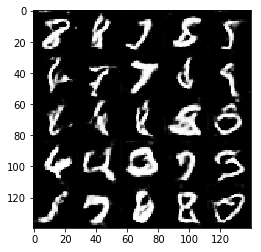

Epoch 2/2... Discriminator Loss: 0.0723... Generator Loss: 4.4412
Epoch 2/2... Discriminator Loss: 0.0230... Generator Loss: 5.6542
Epoch 2/2... Discriminator Loss: 0.1289... Generator Loss: 5.1316
Epoch 2/2... Discriminator Loss: 0.0482... Generator Loss: 5.0467
Epoch 2/2... Discriminator Loss: 1.0815... Generator Loss: 11.6765
Epoch 2/2... Discriminator Loss: 1.7323... Generator Loss: 2.3825
Epoch 2/2... Discriminator Loss: 0.2502... Generator Loss: 3.0572
Epoch 2/2... Discriminator Loss: 1.4827... Generator Loss: 10.8871
Epoch 2/2... Discriminator Loss: 1.8592... Generator Loss: 3.6336
Epoch 2/2... Discriminator Loss: 0.0107... Generator Loss: 4.0490
Epoch 2/2... Discriminator Loss: 0.2531... Generator Loss: 4.4381
Epoch 2/2... Discriminator Loss: 0.1051... Generator Loss: 5.0630
Epoch 2/2... Discriminator Loss: 0.0451... Generator Loss: 5.5132
Epoch 2/2... Discriminator Loss: 0.7171... Generator Loss: 6.9683
Epoch 2/2... Discriminator Loss: 0.7376... Generator Loss: 2.7373
Epoch 2/

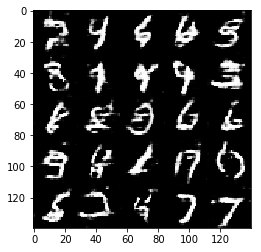

Epoch 2/2... Discriminator Loss: 0.2050... Generator Loss: 4.6403
Epoch 2/2... Discriminator Loss: 0.0415... Generator Loss: 3.6715
Epoch 2/2... Discriminator Loss: 0.0384... Generator Loss: 4.7724
Epoch 2/2... Discriminator Loss: 0.0185... Generator Loss: 5.7751
Epoch 2/2... Discriminator Loss: 0.0017... Generator Loss: 6.9304
Epoch 2/2... Discriminator Loss: 0.0099... Generator Loss: 5.7852
Epoch 2/2... Discriminator Loss: 0.0156... Generator Loss: 6.1509
Epoch 2/2... Discriminator Loss: 0.0247... Generator Loss: 5.3525
Epoch 2/2... Discriminator Loss: 0.0135... Generator Loss: 6.6590
Epoch 2/2... Discriminator Loss: 0.0516... Generator Loss: 5.2647
Epoch 2/2... Discriminator Loss: 0.2436... Generator Loss: 4.6408
Epoch 2/2... Discriminator Loss: 0.0115... Generator Loss: 5.1814
Epoch 2/2... Discriminator Loss: 0.0530... Generator Loss: 4.6859
Epoch 2/2... Discriminator Loss: 0.0840... Generator Loss: 6.5621
Epoch 2/2... Discriminator Loss: 0.0581... Generator Loss: 7.1652
Epoch 2/2.

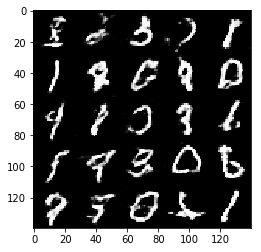

Epoch 2/2... Discriminator Loss: 0.0028... Generator Loss: 6.5420
Epoch 2/2... Discriminator Loss: 0.0142... Generator Loss: 6.0361
Epoch 2/2... Discriminator Loss: 0.0085... Generator Loss: 6.3753
Epoch 2/2... Discriminator Loss: 0.0286... Generator Loss: 7.1962
Epoch 2/2... Discriminator Loss: 0.3532... Generator Loss: 6.6865
Epoch 2/2... Discriminator Loss: 0.0444... Generator Loss: 7.6601
Epoch 2/2... Discriminator Loss: 0.0058... Generator Loss: 7.6137
Epoch 2/2... Discriminator Loss: 0.0202... Generator Loss: 6.8881
Epoch 2/2... Discriminator Loss: 0.0075... Generator Loss: 6.6952
Epoch 2/2... Discriminator Loss: 0.0093... Generator Loss: 7.7664
Epoch 2/2... Discriminator Loss: 0.0165... Generator Loss: 6.8161
Epoch 2/2... Discriminator Loss: 0.0836... Generator Loss: 6.5063
Epoch 2/2... Discriminator Loss: 0.1010... Generator Loss: 12.2799
Epoch 2/2... Discriminator Loss: 0.0048... Generator Loss: 9.1011
Epoch 2/2... Discriminator Loss: 0.0050... Generator Loss: 8.0641
Epoch 2/2

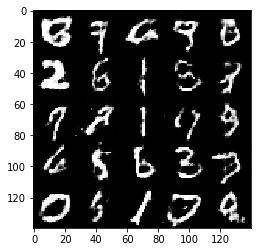

Epoch 2/2... Discriminator Loss: 0.0063... Generator Loss: 6.2011
Epoch 2/2... Discriminator Loss: 0.0068... Generator Loss: 7.5700
Epoch 2/2... Discriminator Loss: 0.0051... Generator Loss: 7.9817
Epoch 2/2... Discriminator Loss: 0.0147... Generator Loss: 6.4160
Epoch 2/2... Discriminator Loss: 0.1247... Generator Loss: 6.6118
Epoch 2/2... Discriminator Loss: 0.5746... Generator Loss: 3.5292
Epoch 2/2... Discriminator Loss: 0.0240... Generator Loss: 3.3067
Epoch 2/2... Discriminator Loss: 0.4312... Generator Loss: 9.7023
Epoch 2/2... Discriminator Loss: 1.6047... Generator Loss: 0.8277
Epoch 2/2... Discriminator Loss: 0.7204... Generator Loss: 7.7175
Epoch 2/2... Discriminator Loss: 0.0703... Generator Loss: 7.3337
Epoch 2/2... Discriminator Loss: 0.4037... Generator Loss: 5.7512
Epoch 2/2... Discriminator Loss: 0.2059... Generator Loss: 4.4648
Epoch 2/2... Discriminator Loss: 0.2005... Generator Loss: 3.8969
Epoch 2/2... Discriminator Loss: 0.3029... Generator Loss: 5.1801
Epoch 2/2.

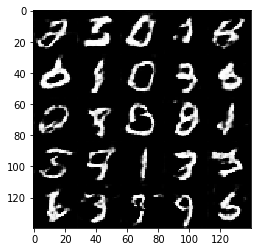

Epoch 2/2... Discriminator Loss: 0.2822... Generator Loss: 4.9930
Epoch 2/2... Discriminator Loss: 1.1722... Generator Loss: 9.0870
Epoch 2/2... Discriminator Loss: 0.7931... Generator Loss: 5.2423
Epoch 2/2... Discriminator Loss: 0.2361... Generator Loss: 4.5037
Epoch 2/2... Discriminator Loss: 0.1639... Generator Loss: 3.9769
Epoch 2/2... Discriminator Loss: 0.6425... Generator Loss: 8.9618
Epoch 2/2... Discriminator Loss: 0.0605... Generator Loss: 11.1829
Epoch 2/2... Discriminator Loss: 0.1947... Generator Loss: 10.8690
Epoch 2/2... Discriminator Loss: 0.2882... Generator Loss: 5.0927
Epoch 2/2... Discriminator Loss: 0.0621... Generator Loss: 4.2373
Epoch 2/2... Discriminator Loss: 0.5466... Generator Loss: 7.7417
Epoch 2/2... Discriminator Loss: 0.1038... Generator Loss: 11.1553
Epoch 2/2... Discriminator Loss: 0.0400... Generator Loss: 10.8840
Epoch 2/2... Discriminator Loss: 0.0564... Generator Loss: 6.1493
Epoch 2/2... Discriminator Loss: 0.0115... Generator Loss: 6.7113
Epoch 

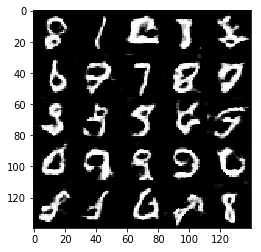

Epoch 2/2... Discriminator Loss: 0.0618... Generator Loss: 6.2239
Epoch 2/2... Discriminator Loss: 0.0118... Generator Loss: 7.8735
Epoch 2/2... Discriminator Loss: 0.0140... Generator Loss: 10.9537
Epoch 2/2... Discriminator Loss: 0.0525... Generator Loss: 7.1295
Epoch 2/2... Discriminator Loss: 0.0156... Generator Loss: 6.4118
Epoch 2/2... Discriminator Loss: 0.0488... Generator Loss: 5.8518
Epoch 2/2... Discriminator Loss: 0.0099... Generator Loss: 6.7971
Epoch 2/2... Discriminator Loss: 0.1877... Generator Loss: 7.1829
Epoch 2/2... Discriminator Loss: 0.0039... Generator Loss: 11.2575
Epoch 2/2... Discriminator Loss: 0.0038... Generator Loss: 9.2882
Epoch 2/2... Discriminator Loss: 0.0172... Generator Loss: 7.6035
Epoch 2/2... Discriminator Loss: 0.5982... Generator Loss: 5.5539
Epoch 2/2... Discriminator Loss: 0.1293... Generator Loss: 5.6593
Epoch 2/2... Discriminator Loss: 0.0533... Generator Loss: 6.1158
Epoch 2/2... Discriminator Loss: 0.1361... Generator Loss: 6.9561
Epoch 2/

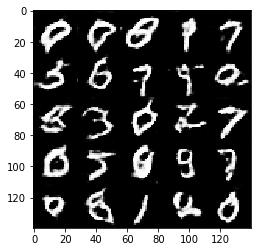

Epoch 2/2... Discriminator Loss: 0.0522... Generator Loss: 8.0774
Epoch 2/2... Discriminator Loss: 0.0338... Generator Loss: 5.3190
Epoch 2/2... Discriminator Loss: 0.0215... Generator Loss: 8.9069
Epoch 2/2... Discriminator Loss: 0.1331... Generator Loss: 4.2999
Epoch 2/2... Discriminator Loss: 0.0221... Generator Loss: 6.3748
Epoch 2/2... Discriminator Loss: 0.0656... Generator Loss: 6.6958
Epoch 2/2... Discriminator Loss: 0.0112... Generator Loss: 6.7065
Epoch 2/2... Discriminator Loss: 0.0207... Generator Loss: 6.2308
Epoch 2/2... Discriminator Loss: 0.0946... Generator Loss: 5.5842
Epoch 2/2... Discriminator Loss: 0.1136... Generator Loss: 5.5598
Epoch 2/2... Discriminator Loss: 0.0468... Generator Loss: 7.3438
Epoch 2/2... Discriminator Loss: 0.2131... Generator Loss: 5.4544
Epoch 2/2... Discriminator Loss: 0.1062... Generator Loss: 4.1959
Epoch 2/2... Discriminator Loss: 0.0502... Generator Loss: 6.5619
Epoch 2/2... Discriminator Loss: 0.6162... Generator Loss: 9.8905
Epoch 2/2.

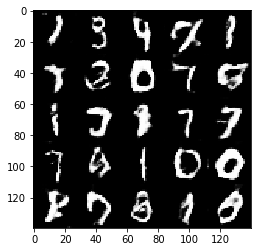

Epoch 2/2... Discriminator Loss: 0.0007... Generator Loss: 9.8471
Epoch 2/2... Discriminator Loss: 0.0061... Generator Loss: 6.3372
Epoch 2/2... Discriminator Loss: 0.0066... Generator Loss: 7.6848
Epoch 2/2... Discriminator Loss: 0.0106... Generator Loss: 6.6266
Epoch 2/2... Discriminator Loss: 0.0077... Generator Loss: 6.3864
Epoch 2/2... Discriminator Loss: 0.0227... Generator Loss: 6.8955
Epoch 2/2... Discriminator Loss: 0.0842... Generator Loss: 6.3098
Epoch 2/2... Discriminator Loss: 0.0171... Generator Loss: 9.6563
Epoch 2/2... Discriminator Loss: 0.0008... Generator Loss: 9.7618
Epoch 2/2... Discriminator Loss: 0.0134... Generator Loss: 8.0444
Epoch 2/2... Discriminator Loss: 0.0107... Generator Loss: 5.7477
Epoch 2/2... Discriminator Loss: 1.1344... Generator Loss: 3.2075
Epoch 2/2... Discriminator Loss: 1.0608... Generator Loss: 12.1345
Epoch 2/2... Discriminator Loss: 1.6865... Generator Loss: 1.4582
Epoch 2/2... Discriminator Loss: 0.2424... Generator Loss: 3.9993
Epoch 2/2

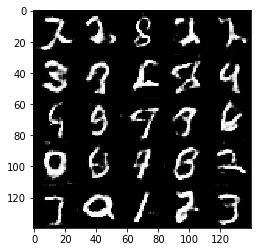

Epoch 2/2... Discriminator Loss: 0.0106... Generator Loss: 6.1603
Epoch 2/2... Discriminator Loss: 0.0414... Generator Loss: 4.9039
Epoch 2/2... Discriminator Loss: 0.2245... Generator Loss: 7.0853
Epoch 2/2... Discriminator Loss: 0.0983... Generator Loss: 7.4634
Epoch 2/2... Discriminator Loss: 0.0989... Generator Loss: 7.4412
Epoch 2/2... Discriminator Loss: 0.0097... Generator Loss: 6.4657
Epoch 2/2... Discriminator Loss: 0.0396... Generator Loss: 5.2320
Epoch 2/2... Discriminator Loss: 0.0322... Generator Loss: 5.7135
Epoch 2/2... Discriminator Loss: 0.1215... Generator Loss: 5.6361
Epoch 2/2... Discriminator Loss: 0.0462... Generator Loss: 7.5128
Epoch 2/2... Discriminator Loss: 0.3840... Generator Loss: 3.6974
Epoch 2/2... Discriminator Loss: 0.2187... Generator Loss: 4.3552
Epoch 2/2... Discriminator Loss: 0.0159... Generator Loss: 6.5882
Epoch 2/2... Discriminator Loss: 1.1043... Generator Loss: 10.1571
Epoch 2/2... Discriminator Loss: 0.4642... Generator Loss: 9.2461
Epoch 2/2

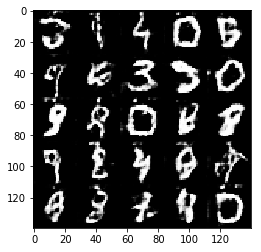

Epoch 2/2... Discriminator Loss: 0.0262... Generator Loss: 7.6571
Epoch 2/2... Discriminator Loss: 0.0052... Generator Loss: 6.7024
Epoch 2/2... Discriminator Loss: 0.0133... Generator Loss: 5.6134
Epoch 2/2... Discriminator Loss: 0.0409... Generator Loss: 6.0092
Epoch 2/2... Discriminator Loss: 0.0014... Generator Loss: 8.0854
Epoch 2/2... Discriminator Loss: 0.0157... Generator Loss: 6.8663
Epoch 2/2... Discriminator Loss: 0.0350... Generator Loss: 8.5120
Epoch 2/2... Discriminator Loss: 0.0136... Generator Loss: 5.7836
Epoch 2/2... Discriminator Loss: 0.0231... Generator Loss: 5.6208
Epoch 2/2... Discriminator Loss: 0.0068... Generator Loss: 8.2506
Epoch 2/2... Discriminator Loss: 0.0289... Generator Loss: 5.5087
Epoch 2/2... Discriminator Loss: 0.0009... Generator Loss: 9.4229
Epoch 2/2... Discriminator Loss: 0.0382... Generator Loss: 4.9491
Epoch 2/2... Discriminator Loss: 0.0029... Generator Loss: 8.3728
Epoch 2/2... Discriminator Loss: 0.0166... Generator Loss: 7.9377
Epoch 2/2.

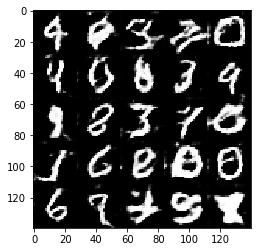

Epoch 2/2... Discriminator Loss: 0.0114... Generator Loss: 5.6900
Epoch 2/2... Discriminator Loss: 0.0181... Generator Loss: 6.3141
Epoch 2/2... Discriminator Loss: 0.0180... Generator Loss: 6.6306
Epoch 2/2... Discriminator Loss: 0.0279... Generator Loss: 6.2783
Epoch 2/2... Discriminator Loss: 0.0097... Generator Loss: 6.7713
Epoch 2/2... Discriminator Loss: 0.0118... Generator Loss: 6.5631
Epoch 2/2... Discriminator Loss: 0.0191... Generator Loss: 6.0744
Epoch 2/2... Discriminator Loss: 0.0423... Generator Loss: 5.4722
Epoch 2/2... Discriminator Loss: 0.0539... Generator Loss: 5.5471
Epoch 2/2... Discriminator Loss: 0.0175... Generator Loss: 6.4980
Epoch 2/2... Discriminator Loss: 0.0170... Generator Loss: 9.0242
Epoch 2/2... Discriminator Loss: 0.0064... Generator Loss: 6.7533
Epoch 2/2... Discriminator Loss: 0.0311... Generator Loss: 5.4338
Epoch 2/2... Discriminator Loss: 0.0187... Generator Loss: 6.1184
Epoch 2/2... Discriminator Loss: 0.0082... Generator Loss: 7.4943
Epoch 2/2.

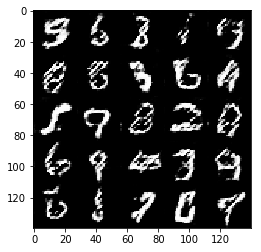

Epoch 2/2... Discriminator Loss: 0.0051... Generator Loss: 9.0449
Epoch 2/2... Discriminator Loss: 0.0011... Generator Loss: 10.2505
Epoch 2/2... Discriminator Loss: 0.0455... Generator Loss: 5.4487
Epoch 2/2... Discriminator Loss: 0.0003... Generator Loss: 9.7343
Epoch 2/2... Discriminator Loss: 0.0011... Generator Loss: 8.2225
Epoch 2/2... Discriminator Loss: 0.0110... Generator Loss: 8.0428
Epoch 2/2... Discriminator Loss: 0.0472... Generator Loss: 8.0590
Epoch 2/2... Discriminator Loss: 0.0349... Generator Loss: 8.3066
Epoch 2/2... Discriminator Loss: 0.0185... Generator Loss: 11.2929
Epoch 2/2... Discriminator Loss: 0.0026... Generator Loss: 8.1527
Epoch 2/2... Discriminator Loss: 0.2067... Generator Loss: 14.0080
Epoch 2/2... Discriminator Loss: 0.1302... Generator Loss: 16.6130
Epoch 2/2... Discriminator Loss: 0.0006... Generator Loss: 15.6177
Epoch 2/2... Discriminator Loss: 0.0481... Generator Loss: 13.4029
Epoch 2/2... Discriminator Loss: 0.0163... Generator Loss: 11.9097
Epo

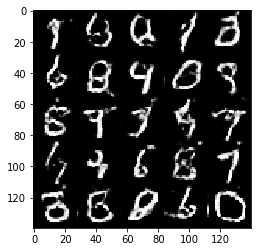

Epoch 2/2... Discriminator Loss: 0.0488... Generator Loss: 5.1920
Epoch 2/2... Discriminator Loss: 0.4677... Generator Loss: 1.2945
Epoch 2/2... Discriminator Loss: 0.4217... Generator Loss: 10.4157
Epoch 2/2... Discriminator Loss: 0.6373... Generator Loss: 15.1685
Epoch 2/2... Discriminator Loss: 2.6622... Generator Loss: 2.3837
Epoch 2/2... Discriminator Loss: 0.8238... Generator Loss: 10.2007
Epoch 2/2... Discriminator Loss: 0.1937... Generator Loss: 9.6183
Epoch 2/2... Discriminator Loss: 0.4405... Generator Loss: 5.4576
Epoch 2/2... Discriminator Loss: 0.3141... Generator Loss: 5.7219
Epoch 2/2... Discriminator Loss: 0.2824... Generator Loss: 8.5022
Epoch 2/2... Discriminator Loss: 0.1788... Generator Loss: 10.3512
Epoch 2/2... Discriminator Loss: 0.7167... Generator Loss: 3.7175
Epoch 2/2... Discriminator Loss: 0.7615... Generator Loss: 5.0055
Epoch 2/2... Discriminator Loss: 0.8201... Generator Loss: 10.1215
Epoch 2/2... Discriminator Loss: 1.0716... Generator Loss: 3.9616
Epoch

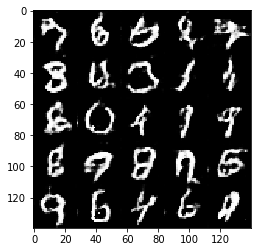

Epoch 2/2... Discriminator Loss: 0.0063... Generator Loss: 6.5520
Epoch 2/2... Discriminator Loss: 1.2642... Generator Loss: 12.1624
Epoch 2/2... Discriminator Loss: 1.1993... Generator Loss: 7.9555
Epoch 2/2... Discriminator Loss: 0.0165... Generator Loss: 5.7806
Epoch 2/2... Discriminator Loss: 0.0694... Generator Loss: 5.4510
Epoch 2/2... Discriminator Loss: 0.5465... Generator Loss: 4.2780
Epoch 2/2... Discriminator Loss: 0.5324... Generator Loss: 8.0652
Epoch 2/2... Discriminator Loss: 0.1975... Generator Loss: 6.6720
Epoch 2/2... Discriminator Loss: 0.0772... Generator Loss: 6.7248
Epoch 2/2... Discriminator Loss: 0.0233... Generator Loss: 7.0213
Epoch 2/2... Discriminator Loss: 0.0805... Generator Loss: 5.2075
Epoch 2/2... Discriminator Loss: 0.0631... Generator Loss: 4.8861
Epoch 2/2... Discriminator Loss: 0.0414... Generator Loss: 6.3081
Epoch 2/2... Discriminator Loss: 0.0161... Generator Loss: 8.1666
Epoch 2/2... Discriminator Loss: 0.2643... Generator Loss: 3.5210
Epoch 2/2

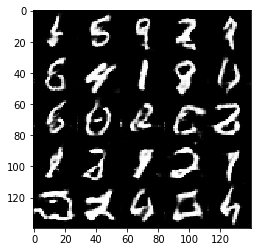

Epoch 2/2... Discriminator Loss: 0.0098... Generator Loss: 12.7708
Epoch 2/2... Discriminator Loss: 0.0207... Generator Loss: 11.1251
Epoch 2/2... Discriminator Loss: 0.3237... Generator Loss: 7.9521
Epoch 2/2... Discriminator Loss: 0.0212... Generator Loss: 4.7289
Epoch 2/2... Discriminator Loss: 0.1170... Generator Loss: 6.1720
Epoch 2/2... Discriminator Loss: 0.0359... Generator Loss: 6.9211
Epoch 2/2... Discriminator Loss: 0.0479... Generator Loss: 6.9658
Epoch 2/2... Discriminator Loss: 0.0070... Generator Loss: 8.3812
Epoch 2/2... Discriminator Loss: 0.0141... Generator Loss: 10.0130
Epoch 2/2... Discriminator Loss: 0.0336... Generator Loss: 9.5829
Epoch 2/2... Discriminator Loss: 0.0110... Generator Loss: 7.8461
Epoch 2/2... Discriminator Loss: 0.0525... Generator Loss: 8.7206
Epoch 2/2... Discriminator Loss: 0.1247... Generator Loss: 8.3343
Epoch 2/2... Discriminator Loss: 0.0183... Generator Loss: 8.1588
Epoch 2/2... Discriminator Loss: 0.3769... Generator Loss: 2.8419
Epoch 2

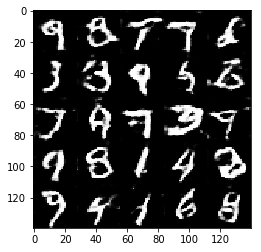

Epoch 2/2... Discriminator Loss: 0.0017... Generator Loss: 9.3821
Epoch 2/2... Discriminator Loss: 0.0090... Generator Loss: 8.0781
Epoch 2/2... Discriminator Loss: 0.0048... Generator Loss: 7.2446
Epoch 2/2... Discriminator Loss: 0.0072... Generator Loss: 7.1858
Epoch 2/2... Discriminator Loss: 0.0284... Generator Loss: 7.0632
Epoch 2/2... Discriminator Loss: 0.0031... Generator Loss: 7.4544
Epoch 2/2... Discriminator Loss: 0.0103... Generator Loss: 5.8501
Epoch 2/2... Discriminator Loss: 0.0464... Generator Loss: 5.7008
Epoch 2/2... Discriminator Loss: 0.0278... Generator Loss: 8.0210
Epoch 2/2... Discriminator Loss: 0.1715... Generator Loss: 3.9402
Epoch 2/2... Discriminator Loss: 0.0133... Generator Loss: 5.0921
Epoch 2/2... Discriminator Loss: 0.2192... Generator Loss: 6.5373
Epoch 2/2... Discriminator Loss: 0.0668... Generator Loss: 7.8249
Epoch 2/2... Discriminator Loss: 0.0016... Generator Loss: 9.2705
Epoch 2/2... Discriminator Loss: 0.0046... Generator Loss: 9.3056
Epoch 2/2.

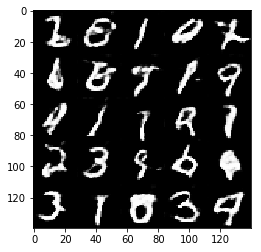

Epoch 2/2... Discriminator Loss: 0.0104... Generator Loss: 6.2214
Epoch 2/2... Discriminator Loss: 0.0673... Generator Loss: 5.1907
Epoch 2/2... Discriminator Loss: 0.0670... Generator Loss: 5.5322
Epoch 2/2... Discriminator Loss: 0.0121... Generator Loss: 6.8282
Epoch 2/2... Discriminator Loss: 0.0329... Generator Loss: 6.3050
Epoch 2/2... Discriminator Loss: 0.0223... Generator Loss: 5.7490
Epoch 2/2... Discriminator Loss: 0.0781... Generator Loss: 6.2046
Epoch 2/2... Discriminator Loss: 0.0057... Generator Loss: 9.9488
Epoch 2/2... Discriminator Loss: 0.0172... Generator Loss: 6.7045
Epoch 2/2... Discriminator Loss: 0.0037... Generator Loss: 6.8628
Epoch 2/2... Discriminator Loss: 0.0093... Generator Loss: 6.0131
Epoch 2/2... Discriminator Loss: 0.0264... Generator Loss: 7.9899
Epoch 2/2... Discriminator Loss: 0.0371... Generator Loss: 5.0871
Epoch 2/2... Discriminator Loss: 0.0499... Generator Loss: 5.7906
Epoch 2/2... Discriminator Loss: 0.0600... Generator Loss: 5.7927
Epoch 2/2.

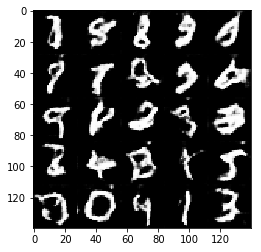

Epoch 2/2... Discriminator Loss: 1.0742... Generator Loss: 10.5814
Epoch 2/2... Discriminator Loss: 0.0332... Generator Loss: 7.8497
Epoch 2/2... Discriminator Loss: 0.3267... Generator Loss: 5.5136
Epoch 2/2... Discriminator Loss: 0.3599... Generator Loss: 4.0360
Epoch 2/2... Discriminator Loss: 0.1712... Generator Loss: 6.8538
Epoch 2/2... Discriminator Loss: 0.3455... Generator Loss: 8.9990
Epoch 2/2... Discriminator Loss: 0.0749... Generator Loss: 9.9720
Epoch 2/2... Discriminator Loss: 0.1331... Generator Loss: 4.4341
Epoch 2/2... Discriminator Loss: 0.0636... Generator Loss: 8.4706
Epoch 2/2... Discriminator Loss: 0.1379... Generator Loss: 4.8645
Epoch 2/2... Discriminator Loss: 1.1148... Generator Loss: 12.2852
Epoch 2/2... Discriminator Loss: 0.7597... Generator Loss: 7.6747
Epoch 2/2... Discriminator Loss: 0.0301... Generator Loss: 5.0519
Epoch 2/2... Discriminator Loss: 0.0026... Generator Loss: 6.5263
Epoch 2/2... Discriminator Loss: 0.7597... Generator Loss: 8.6963
Epoch 2/

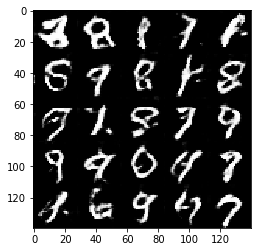

Epoch 2/2... Discriminator Loss: 0.0090... Generator Loss: 7.9759
Epoch 2/2... Discriminator Loss: 0.0161... Generator Loss: 9.8900
Epoch 2/2... Discriminator Loss: 0.0092... Generator Loss: 6.4834
Epoch 2/2... Discriminator Loss: 0.0243... Generator Loss: 6.1292
Epoch 2/2... Discriminator Loss: 0.0626... Generator Loss: 6.0417
Epoch 2/2... Discriminator Loss: 0.0182... Generator Loss: 9.2064
Epoch 2/2... Discriminator Loss: 0.0078... Generator Loss: 8.8734
Epoch 2/2... Discriminator Loss: 0.0152... Generator Loss: 7.0345
Epoch 2/2... Discriminator Loss: 0.0082... Generator Loss: 7.3562
Epoch 2/2... Discriminator Loss: 0.0369... Generator Loss: 5.6691
Epoch 2/2... Discriminator Loss: 0.0376... Generator Loss: 5.4059
Epoch 2/2... Discriminator Loss: 0.0011... Generator Loss: 11.8245
Epoch 2/2... Discriminator Loss: 0.0031... Generator Loss: 9.3250
Epoch 2/2... Discriminator Loss: 0.0306... Generator Loss: 6.4907
Epoch 2/2... Discriminator Loss: 0.0234... Generator Loss: 6.6399
Epoch 2/2

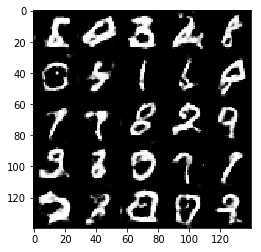

Epoch 2/2... Discriminator Loss: 0.0055... Generator Loss: 8.4178
Epoch 2/2... Discriminator Loss: 0.0047... Generator Loss: 8.8915
Epoch 2/2... Discriminator Loss: 1.2516... Generator Loss: 2.5319
Epoch 2/2... Discriminator Loss: 0.5257... Generator Loss: 5.3218
Epoch 2/2... Discriminator Loss: 1.2774... Generator Loss: 12.9961
Epoch 2/2... Discriminator Loss: 0.8746... Generator Loss: 12.2282
Epoch 2/2... Discriminator Loss: 0.1473... Generator Loss: 4.7673
Epoch 2/2... Discriminator Loss: 0.0066... Generator Loss: 8.1437
Epoch 2/2... Discriminator Loss: 0.0612... Generator Loss: 6.6553
Epoch 2/2... Discriminator Loss: 0.1255... Generator Loss: 6.5327
Epoch 2/2... Discriminator Loss: 0.0470... Generator Loss: 6.4191
Epoch 2/2... Discriminator Loss: 0.1149... Generator Loss: 4.7667
Epoch 2/2... Discriminator Loss: 0.2715... Generator Loss: 5.0007
Epoch 2/2... Discriminator Loss: 2.1367... Generator Loss: 16.6160
Epoch 2/2... Discriminator Loss: 1.4651... Generator Loss: 8.7335
Epoch 2

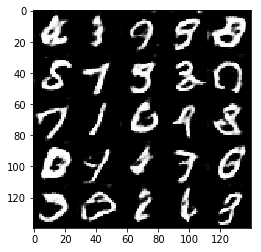

Epoch 2/2... Discriminator Loss: 0.3913... Generator Loss: 4.7680
Epoch 2/2... Discriminator Loss: 0.0517... Generator Loss: 6.2635
Epoch 2/2... Discriminator Loss: 0.5281... Generator Loss: 7.9583
Epoch 2/2... Discriminator Loss: 0.0736... Generator Loss: 9.2465
Epoch 2/2... Discriminator Loss: 0.4644... Generator Loss: 4.7241
Epoch 2/2... Discriminator Loss: 0.0193... Generator Loss: 7.0245
Epoch 2/2... Discriminator Loss: 0.0906... Generator Loss: 4.5659
Epoch 2/2... Discriminator Loss: 0.1059... Generator Loss: 5.3623
Epoch 2/2... Discriminator Loss: 0.0596... Generator Loss: 4.3714
Epoch 2/2... Discriminator Loss: 0.0197... Generator Loss: 5.6734
Epoch 2/2... Discriminator Loss: 0.2010... Generator Loss: 5.1707
Epoch 2/2... Discriminator Loss: 0.2216... Generator Loss: 3.8976
Epoch 2/2... Discriminator Loss: 0.1612... Generator Loss: 5.1963
Epoch 2/2... Discriminator Loss: 0.4564... Generator Loss: 8.9360
Epoch 2/2... Discriminator Loss: 0.6611... Generator Loss: 8.1337
Epoch 2/2.

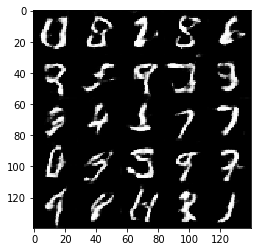

Epoch 2/2... Discriminator Loss: 0.0452... Generator Loss: 6.6892
Epoch 2/2... Discriminator Loss: 0.0526... Generator Loss: 6.8978
Epoch 2/2... Discriminator Loss: 0.0052... Generator Loss: 10.4422
Epoch 2/2... Discriminator Loss: 0.0109... Generator Loss: 6.5716
Epoch 2/2... Discriminator Loss: 0.0051... Generator Loss: 8.9056
Epoch 2/2... Discriminator Loss: 0.0410... Generator Loss: 6.9854
Epoch 2/2... Discriminator Loss: 0.1111... Generator Loss: 4.6382
Epoch 2/2... Discriminator Loss: 0.0569... Generator Loss: 6.0338
Epoch 2/2... Discriminator Loss: 0.0027... Generator Loss: 8.8531
Epoch 2/2... Discriminator Loss: 0.1908... Generator Loss: 6.2690
Epoch 2/2... Discriminator Loss: 0.4932... Generator Loss: 7.0769
Epoch 2/2... Discriminator Loss: 0.0073... Generator Loss: 7.5533
Epoch 2/2... Discriminator Loss: 0.0464... Generator Loss: 6.3551
Epoch 2/2... Discriminator Loss: 0.0341... Generator Loss: 8.9432
Epoch 2/2... Discriminator Loss: 0.0795... Generator Loss: 6.8223
Epoch 2/2

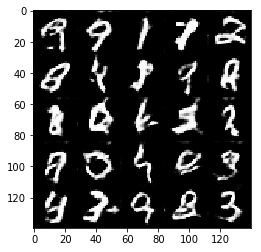

Epoch 2/2... Discriminator Loss: 0.0344... Generator Loss: 7.1111
Epoch 2/2... Discriminator Loss: 0.0077... Generator Loss: 6.2851
Epoch 2/2... Discriminator Loss: 0.0042... Generator Loss: 5.9648
Epoch 2/2... Discriminator Loss: 0.1023... Generator Loss: 6.6345
Epoch 2/2... Discriminator Loss: 0.0269... Generator Loss: 7.3834
Epoch 2/2... Discriminator Loss: 0.0017... Generator Loss: 8.6659
Epoch 2/2... Discriminator Loss: 0.0025... Generator Loss: 7.9640
Epoch 2/2... Discriminator Loss: 0.0500... Generator Loss: 7.6824
Epoch 2/2... Discriminator Loss: 0.0463... Generator Loss: 4.8806
Epoch 2/2... Discriminator Loss: 0.0004... Generator Loss: 9.7362
Epoch 2/2... Discriminator Loss: 0.0043... Generator Loss: 7.6045
Epoch 2/2... Discriminator Loss: 0.0023... Generator Loss: 7.9972
Epoch 2/2... Discriminator Loss: 0.0190... Generator Loss: 7.1697
Epoch 2/2... Discriminator Loss: 0.0060... Generator Loss: 6.8883
Epoch 2/2... Discriminator Loss: 0.0038... Generator Loss: 8.0464
Epoch 2/2.

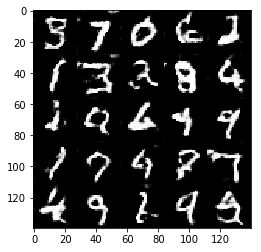

Epoch 2/2... Discriminator Loss: 0.0087... Generator Loss: 8.0056
Epoch 2/2... Discriminator Loss: 0.0011... Generator Loss: 10.2766
Epoch 2/2... Discriminator Loss: 0.0012... Generator Loss: 10.9122
Epoch 2/2... Discriminator Loss: 0.0044... Generator Loss: 7.3139
Epoch 2/2... Discriminator Loss: 0.0125... Generator Loss: 9.5313
Epoch 2/2... Discriminator Loss: 0.0068... Generator Loss: 6.9902
Epoch 2/2... Discriminator Loss: 0.0014... Generator Loss: 8.4596
Epoch 2/2... Discriminator Loss: 0.0302... Generator Loss: 5.2807
Epoch 2/2... Discriminator Loss: 0.0045... Generator Loss: 7.2586
Epoch 2/2... Discriminator Loss: 0.0757... Generator Loss: 6.5134
Epoch 2/2... Discriminator Loss: 0.0549... Generator Loss: 4.8195
Epoch 2/2... Discriminator Loss: 0.0300... Generator Loss: 7.1231
Epoch 2/2... Discriminator Loss: 0.0036... Generator Loss: 7.7248
Epoch 2/2... Discriminator Loss: 0.0546... Generator Loss: 7.4657
Epoch 2/2... Discriminator Loss: 0.0303... Generator Loss: 4.7875
Epoch 2/

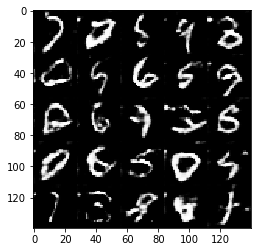

Epoch 2/2... Discriminator Loss: 0.0081... Generator Loss: 5.7448
Epoch 2/2... Discriminator Loss: 0.2063... Generator Loss: 7.7335
Epoch 2/2... Discriminator Loss: 0.0307... Generator Loss: 7.2706
Epoch 2/2... Discriminator Loss: 0.1361... Generator Loss: 6.4722
Epoch 2/2... Discriminator Loss: 0.3076... Generator Loss: 8.6482
Epoch 2/2... Discriminator Loss: 0.0513... Generator Loss: 5.7941
Epoch 2/2... Discriminator Loss: 0.0273... Generator Loss: 6.9988
Epoch 2/2... Discriminator Loss: 0.0009... Generator Loss: 8.0669
Epoch 2/2... Discriminator Loss: 0.0504... Generator Loss: 6.0116
Epoch 2/2... Discriminator Loss: 0.0032... Generator Loss: 7.3024
Epoch 2/2... Discriminator Loss: 0.0032... Generator Loss: 7.4936
Epoch 2/2... Discriminator Loss: 0.1919... Generator Loss: 7.3232
Epoch 2/2... Discriminator Loss: 0.1160... Generator Loss: 8.5220
Epoch 2/2... Discriminator Loss: 0.0813... Generator Loss: 8.4467
Epoch 2/2... Discriminator Loss: 0.0127... Generator Loss: 4.5584
Epoch 2/2.

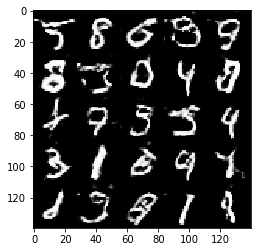

Epoch 2/2... Discriminator Loss: 0.2095... Generator Loss: 4.9004
Epoch 2/2... Discriminator Loss: 0.0017... Generator Loss: 8.8075
Epoch 2/2... Discriminator Loss: 0.0008... Generator Loss: 8.1230
Epoch 2/2... Discriminator Loss: 0.0039... Generator Loss: 9.9086
Epoch 2/2... Discriminator Loss: 0.0046... Generator Loss: 7.4500
Epoch 2/2... Discriminator Loss: 0.0012... Generator Loss: 11.3799
Epoch 2/2... Discriminator Loss: 0.0394... Generator Loss: 7.8653
Epoch 2/2... Discriminator Loss: 0.0161... Generator Loss: 9.2780
Epoch 2/2... Discriminator Loss: 0.0166... Generator Loss: 5.3690
Epoch 2/2... Discriminator Loss: 0.0345... Generator Loss: 5.6722
Epoch 2/2... Discriminator Loss: 0.0115... Generator Loss: 6.5812
Epoch 2/2... Discriminator Loss: 0.0180... Generator Loss: 7.6250
Epoch 2/2... Discriminator Loss: 0.0032... Generator Loss: 8.1614
Epoch 2/2... Discriminator Loss: 0.0800... Generator Loss: 7.1543
Epoch 2/2... Discriminator Loss: 0.0077... Generator Loss: 6.0957
Epoch 2/2

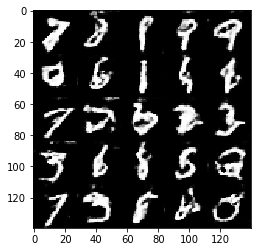

Epoch 2/2... Discriminator Loss: 0.0368... Generator Loss: 7.0256
Epoch 2/2... Discriminator Loss: 0.0035... Generator Loss: 8.5635
Epoch 2/2... Discriminator Loss: 0.0022... Generator Loss: 10.6835
Epoch 2/2... Discriminator Loss: 0.0035... Generator Loss: 10.8448
Epoch 2/2... Discriminator Loss: 0.0014... Generator Loss: 8.0511
Epoch 2/2... Discriminator Loss: 0.0006... Generator Loss: 9.3903
Epoch 2/2... Discriminator Loss: 0.0066... Generator Loss: 13.0395
Epoch 2/2... Discriminator Loss: 0.0015... Generator Loss: 7.8343
Epoch 2/2... Discriminator Loss: 0.0014... Generator Loss: 9.6805
Epoch 2/2... Discriminator Loss: 0.0001... Generator Loss: 11.2050
Epoch 2/2... Discriminator Loss: 0.0004... Generator Loss: 9.1485
Epoch 2/2... Discriminator Loss: 0.0018... Generator Loss: 7.9426
Epoch 2/2... Discriminator Loss: 0.0044... Generator Loss: 8.1892
Epoch 2/2... Discriminator Loss: 0.0190... Generator Loss: 6.7228
Epoch 2/2... Discriminator Loss: 0.0021... Generator Loss: 8.7648
Epoch 

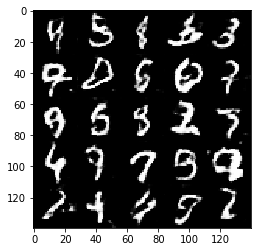

Epoch 2/2... Discriminator Loss: 0.0010... Generator Loss: 8.4418
Epoch 2/2... Discriminator Loss: 0.0044... Generator Loss: 7.0278
Epoch 2/2... Discriminator Loss: 0.0011... Generator Loss: 8.6514
Epoch 2/2... Discriminator Loss: 0.0001... Generator Loss: 11.0580
Epoch 2/2... Discriminator Loss: 0.0200... Generator Loss: 12.3959
Epoch 2/2... Discriminator Loss: 0.0009... Generator Loss: 9.0804
Epoch 2/2... Discriminator Loss: 0.0030... Generator Loss: 7.5638
Epoch 2/2... Discriminator Loss: 0.0433... Generator Loss: 5.4506
Epoch 2/2... Discriminator Loss: 0.0085... Generator Loss: 8.9787
Epoch 2/2... Discriminator Loss: 0.0007... Generator Loss: 9.3583
Epoch 2/2... Discriminator Loss: 0.0103... Generator Loss: 8.6947
Epoch 2/2... Discriminator Loss: 0.0578... Generator Loss: 7.6567
Epoch 2/2... Discriminator Loss: 0.0063... Generator Loss: 8.8275
Epoch 2/2... Discriminator Loss: 0.0025... Generator Loss: 8.5059
Epoch 2/2... Discriminator Loss: 0.0334... Generator Loss: 5.4917
Epoch 2/

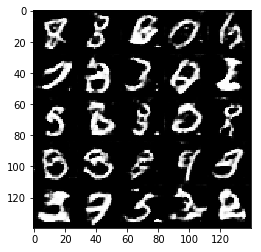

Epoch 2/2... Discriminator Loss: 0.0022... Generator Loss: 8.7505
Epoch 2/2... Discriminator Loss: 0.1151... Generator Loss: 10.2170
Epoch 2/2... Discriminator Loss: 0.0019... Generator Loss: 6.4428
Epoch 2/2... Discriminator Loss: 0.0571... Generator Loss: 8.3970
Epoch 2/2... Discriminator Loss: 0.0000... Generator Loss: 12.1858
Epoch 2/2... Discriminator Loss: 0.1838... Generator Loss: 8.7460
Epoch 2/2... Discriminator Loss: 0.0016... Generator Loss: 10.7836
Epoch 2/2... Discriminator Loss: 0.0310... Generator Loss: 16.4836
Epoch 2/2... Discriminator Loss: 0.1165... Generator Loss: 9.3493
Epoch 2/2... Discriminator Loss: 0.0074... Generator Loss: 7.2995
Epoch 2/2... Discriminator Loss: 0.1373... Generator Loss: 7.0811
Epoch 2/2... Discriminator Loss: 0.0032... Generator Loss: 11.3630
Epoch 2/2... Discriminator Loss: 0.0301... Generator Loss: 12.2291
Epoch 2/2... Discriminator Loss: 0.0666... Generator Loss: 5.6640
Epoch 2/2... Discriminator Loss: 0.0117... Generator Loss: 7.5780
Epoc

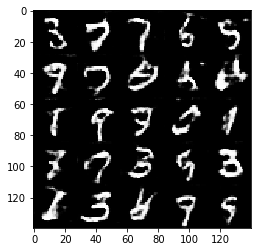

Epoch 2/2... Discriminator Loss: 0.0131... Generator Loss: 10.6861
Epoch 2/2... Discriminator Loss: 0.1700... Generator Loss: 7.8490
Epoch 2/2... Discriminator Loss: 0.1630... Generator Loss: 6.4082
Epoch 2/2... Discriminator Loss: 0.0896... Generator Loss: 9.3270
Epoch 2/2... Discriminator Loss: 0.8028... Generator Loss: 12.0068
Epoch 2/2... Discriminator Loss: 0.7403... Generator Loss: 9.5150
Epoch 2/2... Discriminator Loss: 0.0632... Generator Loss: 7.4231
Epoch 2/2... Discriminator Loss: 0.0454... Generator Loss: 5.3487
Epoch 2/2... Discriminator Loss: 0.0797... Generator Loss: 6.6284
Epoch 2/2... Discriminator Loss: 0.3315... Generator Loss: 7.2479
Epoch 2/2... Discriminator Loss: 0.0033... Generator Loss: 9.9771
Epoch 2/2... Discriminator Loss: 0.0335... Generator Loss: 7.4555
Epoch 2/2... Discriminator Loss: 0.0820... Generator Loss: 5.7409
Epoch 2/2... Discriminator Loss: 0.0481... Generator Loss: 5.7238
Epoch 2/2... Discriminator Loss: 0.0702... Generator Loss: 6.2785
Epoch 2/

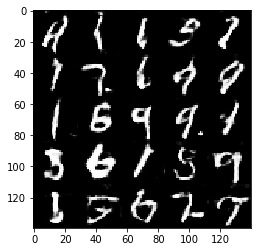

Epoch 2/2... Discriminator Loss: 0.0071... Generator Loss: 6.3447
Epoch 2/2... Discriminator Loss: 0.0141... Generator Loss: 6.0919
Epoch 2/2... Discriminator Loss: 0.0034... Generator Loss: 8.0594
Epoch 2/2... Discriminator Loss: 0.0653... Generator Loss: 9.4105
Epoch 2/2... Discriminator Loss: 0.0223... Generator Loss: 7.4743
Epoch 2/2... Discriminator Loss: 0.0270... Generator Loss: 7.1129
Epoch 2/2... Discriminator Loss: 0.0134... Generator Loss: 7.1343
Epoch 2/2... Discriminator Loss: 0.0230... Generator Loss: 9.5740
Epoch 2/2... Discriminator Loss: 0.0277... Generator Loss: 8.7614
Epoch 2/2... Discriminator Loss: 0.0067... Generator Loss: 7.6847
Epoch 2/2... Discriminator Loss: 0.3640... Generator Loss: 6.6974
Epoch 2/2... Discriminator Loss: 0.0466... Generator Loss: 3.9508
Epoch 2/2... Discriminator Loss: 0.4274... Generator Loss: 11.2840
Epoch 2/2... Discriminator Loss: 0.0034... Generator Loss: 11.8375
Epoch 2/2... Discriminator Loss: 0.0115... Generator Loss: 12.3099
Epoch 2

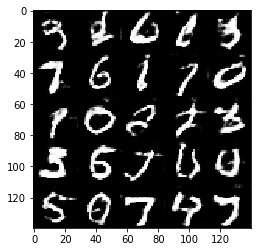

Epoch 2/2... Discriminator Loss: 0.8588... Generator Loss: 7.6298
Epoch 2/2... Discriminator Loss: 1.1537... Generator Loss: 0.9534
Epoch 2/2... Discriminator Loss: 2.2676... Generator Loss: 0.0387
Epoch 2/2... Discriminator Loss: 4.0188... Generator Loss: 6.6781
Epoch 2/2... Discriminator Loss: 3.6606... Generator Loss: 11.8634
Epoch 2/2... Discriminator Loss: 2.3691... Generator Loss: 11.2208
Epoch 2/2... Discriminator Loss: 1.9961... Generator Loss: 2.0105
Epoch 2/2... Discriminator Loss: 1.0633... Generator Loss: 3.2688
Epoch 2/2... Discriminator Loss: 1.2228... Generator Loss: 5.3446
Epoch 2/2... Discriminator Loss: 0.4184... Generator Loss: 7.0041
Epoch 2/2... Discriminator Loss: 1.6378... Generator Loss: 1.9829
Epoch 2/2... Discriminator Loss: 2.0208... Generator Loss: 4.6952
Epoch 2/2... Discriminator Loss: 0.2597... Generator Loss: 6.6362
Epoch 2/2... Discriminator Loss: 0.8029... Generator Loss: 3.6213
Epoch 2/2... Discriminator Loss: 0.2229... Generator Loss: 4.5435
Epoch 2/

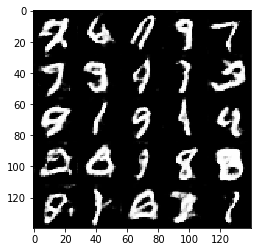

Epoch 2/2... Discriminator Loss: 0.5697... Generator Loss: 6.3996
Epoch 2/2... Discriminator Loss: 0.1451... Generator Loss: 7.0203
Epoch 2/2... Discriminator Loss: 0.0436... Generator Loss: 8.4359
Epoch 2/2... Discriminator Loss: 1.0559... Generator Loss: 3.0686
Epoch 2/2... Discriminator Loss: 0.1980... Generator Loss: 3.4271
Epoch 2/2... Discriminator Loss: 0.4571... Generator Loss: 8.2040
Epoch 2/2... Discriminator Loss: 0.1508... Generator Loss: 7.0929
Epoch 2/2... Discriminator Loss: 0.7610... Generator Loss: 3.4393
Epoch 2/2... Discriminator Loss: 0.2532... Generator Loss: 3.6484
Epoch 2/2... Discriminator Loss: 0.1050... Generator Loss: 6.5669
Epoch 2/2... Discriminator Loss: 0.3255... Generator Loss: 6.3368
Epoch 2/2... Discriminator Loss: 0.3682... Generator Loss: 5.2100
Epoch 2/2... Discriminator Loss: 0.0202... Generator Loss: 7.4605
Epoch 2/2... Discriminator Loss: 0.1699... Generator Loss: 6.0882
Epoch 2/2... Discriminator Loss: 0.0238... Generator Loss: 5.3458
Epoch 2/2.

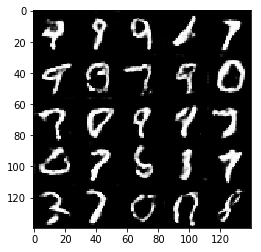

Epoch 2/2... Discriminator Loss: 0.0227... Generator Loss: 6.6454
Epoch 2/2... Discriminator Loss: 0.0128... Generator Loss: 5.9784
Epoch 2/2... Discriminator Loss: 0.0170... Generator Loss: 5.7426
Epoch 2/2... Discriminator Loss: 0.0206... Generator Loss: 5.7126
Epoch 2/2... Discriminator Loss: 0.0133... Generator Loss: 7.4490
Epoch 2/2... Discriminator Loss: 0.0061... Generator Loss: 9.5598
Epoch 2/2... Discriminator Loss: 0.0083... Generator Loss: 7.2896
Epoch 2/2... Discriminator Loss: 0.1025... Generator Loss: 4.8313
Epoch 2/2... Discriminator Loss: 0.1192... Generator Loss: 4.5569
Epoch 2/2... Discriminator Loss: 0.0253... Generator Loss: 6.3093
Epoch 2/2... Discriminator Loss: 0.0481... Generator Loss: 6.9035
Epoch 2/2... Discriminator Loss: 0.0229... Generator Loss: 5.8693
Epoch 2/2... Discriminator Loss: 0.0220... Generator Loss: 6.0038
Epoch 2/2... Discriminator Loss: 0.0170... Generator Loss: 6.3691
Epoch 2/2... Discriminator Loss: 0.0085... Generator Loss: 6.8089
Epoch 2/2.

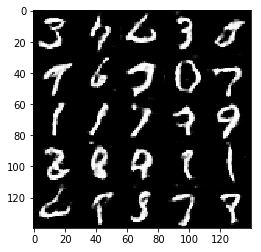

In [18]:
batch_size = 16
z_dim = 100
learning_rate = 0.004
beta1 = 0.5
tf.reset_default_graph()

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 1.9878... Generator Loss: 1.7040
Epoch 1/1... Discriminator Loss: 4.7793... Generator Loss: 3.1552
Epoch 1/1... Discriminator Loss: 2.5606... Generator Loss: 5.8914
Epoch 1/1... Discriminator Loss: 1.4759... Generator Loss: 6.2080
Epoch 1/1... Discriminator Loss: 1.9104... Generator Loss: 5.8234
Epoch 1/1... Discriminator Loss: 1.3090... Generator Loss: 4.8224
Epoch 1/1... Discriminator Loss: 1.3277... Generator Loss: 5.6507
Epoch 1/1... Discriminator Loss: 0.7924... Generator Loss: 5.6046
Epoch 1/1... Discriminator Loss: 1.4679... Generator Loss: 7.0641
Epoch 1/1... Discriminator Loss: 0.9685... Generator Loss: 6.7324
Epoch 1/1... Discriminator Loss: 0.9184... Generator Loss: 4.8362
Epoch 1/1... Discriminator Loss: 1.0614... Generator Loss: 6.8269
Epoch 1/1... Discriminator Loss: 0.6674... Generator Loss: 6.9211
Epoch 1/1... Discriminator Loss: 0.8238... Generator Loss: 4.3808
Epoch 1/1... Discriminator Loss: 1.1405... Generator Loss: 7.1153
Epoch 1/1.

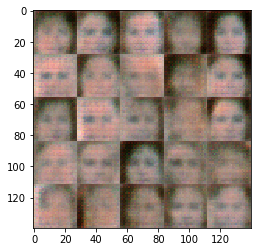

Epoch 1/1... Discriminator Loss: 0.7535... Generator Loss: 3.2122
Epoch 1/1... Discriminator Loss: 0.8003... Generator Loss: 1.6723
Epoch 1/1... Discriminator Loss: 1.3194... Generator Loss: 6.3788
Epoch 1/1... Discriminator Loss: 1.7071... Generator Loss: 1.7424
Epoch 1/1... Discriminator Loss: 1.5653... Generator Loss: 5.7607
Epoch 1/1... Discriminator Loss: 1.4138... Generator Loss: 1.7891
Epoch 1/1... Discriminator Loss: 0.8639... Generator Loss: 3.2378
Epoch 1/1... Discriminator Loss: 0.5403... Generator Loss: 3.2491
Epoch 1/1... Discriminator Loss: 0.6582... Generator Loss: 3.2171
Epoch 1/1... Discriminator Loss: 0.8407... Generator Loss: 3.7249
Epoch 1/1... Discriminator Loss: 0.9447... Generator Loss: 1.4041
Epoch 1/1... Discriminator Loss: 1.3613... Generator Loss: 4.7582
Epoch 1/1... Discriminator Loss: 1.1852... Generator Loss: 1.3214
Epoch 1/1... Discriminator Loss: 0.9764... Generator Loss: 1.7020
Epoch 1/1... Discriminator Loss: 1.0332... Generator Loss: 4.5946
Epoch 1/1.

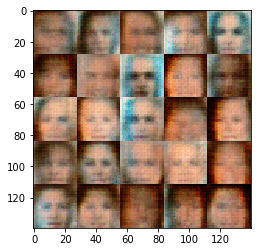

Epoch 1/1... Discriminator Loss: 1.1127... Generator Loss: 1.3663
Epoch 1/1... Discriminator Loss: 1.0500... Generator Loss: 2.9429
Epoch 1/1... Discriminator Loss: 1.3075... Generator Loss: 1.6676
Epoch 1/1... Discriminator Loss: 1.1244... Generator Loss: 1.3616
Epoch 1/1... Discriminator Loss: 0.6978... Generator Loss: 3.2510
Epoch 1/1... Discriminator Loss: 0.7305... Generator Loss: 3.0037
Epoch 1/1... Discriminator Loss: 0.4946... Generator Loss: 3.5522
Epoch 1/1... Discriminator Loss: 1.0613... Generator Loss: 7.0166
Epoch 1/1... Discriminator Loss: 2.2840... Generator Loss: 1.2929
Epoch 1/1... Discriminator Loss: 0.8718... Generator Loss: 2.9228
Epoch 1/1... Discriminator Loss: 0.6249... Generator Loss: 3.1026
Epoch 1/1... Discriminator Loss: 0.8528... Generator Loss: 1.6308
Epoch 1/1... Discriminator Loss: 0.9793... Generator Loss: 2.7778
Epoch 1/1... Discriminator Loss: 0.6243... Generator Loss: 3.1851
Epoch 1/1... Discriminator Loss: 1.0096... Generator Loss: 1.3396
Epoch 1/1.

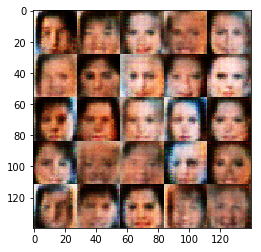

Epoch 1/1... Discriminator Loss: 1.0817... Generator Loss: 4.2126
Epoch 1/1... Discriminator Loss: 1.0656... Generator Loss: 3.2825
Epoch 1/1... Discriminator Loss: 0.6687... Generator Loss: 1.6136
Epoch 1/1... Discriminator Loss: 1.2450... Generator Loss: 2.8142
Epoch 1/1... Discriminator Loss: 0.8772... Generator Loss: 2.9566
Epoch 1/1... Discriminator Loss: 0.7635... Generator Loss: 1.9959
Epoch 1/1... Discriminator Loss: 1.4460... Generator Loss: 3.6185
Epoch 1/1... Discriminator Loss: 1.2624... Generator Loss: 3.2157
Epoch 1/1... Discriminator Loss: 0.9629... Generator Loss: 2.8706
Epoch 1/1... Discriminator Loss: 1.7288... Generator Loss: 1.6633
Epoch 1/1... Discriminator Loss: 1.3022... Generator Loss: 5.5881
Epoch 1/1... Discriminator Loss: 1.7939... Generator Loss: 1.7560
Epoch 1/1... Discriminator Loss: 0.6692... Generator Loss: 2.6150
Epoch 1/1... Discriminator Loss: 0.8887... Generator Loss: 3.0599
Epoch 1/1... Discriminator Loss: 1.2750... Generator Loss: 1.6770
Epoch 1/1.

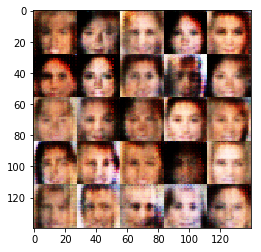

Epoch 1/1... Discriminator Loss: 0.5517... Generator Loss: 3.1915
Epoch 1/1... Discriminator Loss: 0.5166... Generator Loss: 3.2486
Epoch 1/1... Discriminator Loss: 0.7161... Generator Loss: 2.9289
Epoch 1/1... Discriminator Loss: 0.4472... Generator Loss: 3.9472
Epoch 1/1... Discriminator Loss: 0.7346... Generator Loss: 2.8007
Epoch 1/1... Discriminator Loss: 0.7106... Generator Loss: 4.2809
Epoch 1/1... Discriminator Loss: 0.7008... Generator Loss: 0.9186
Epoch 1/1... Discriminator Loss: 1.2543... Generator Loss: 4.1110
Epoch 1/1... Discriminator Loss: 0.5873... Generator Loss: 3.6061
Epoch 1/1... Discriminator Loss: 1.0420... Generator Loss: 4.3625
Epoch 1/1... Discriminator Loss: 0.5180... Generator Loss: 2.8980
Epoch 1/1... Discriminator Loss: 1.2281... Generator Loss: 3.5483
Epoch 1/1... Discriminator Loss: 2.1329... Generator Loss: 1.9458
Epoch 1/1... Discriminator Loss: 0.9496... Generator Loss: 2.3368
Epoch 1/1... Discriminator Loss: 1.5063... Generator Loss: 5.0175
Epoch 1/1.

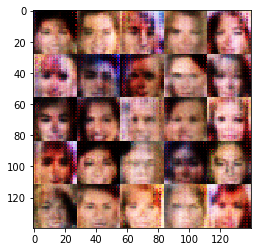

Epoch 1/1... Discriminator Loss: 0.3657... Generator Loss: 4.7420
Epoch 1/1... Discriminator Loss: 0.4501... Generator Loss: 2.8251
Epoch 1/1... Discriminator Loss: 0.8738... Generator Loss: 3.8421
Epoch 1/1... Discriminator Loss: 0.8819... Generator Loss: 3.3347
Epoch 1/1... Discriminator Loss: 0.8744... Generator Loss: 4.0149
Epoch 1/1... Discriminator Loss: 0.5582... Generator Loss: 2.2326
Epoch 1/1... Discriminator Loss: 0.7647... Generator Loss: 2.2017
Epoch 1/1... Discriminator Loss: 1.1320... Generator Loss: 4.6037
Epoch 1/1... Discriminator Loss: 0.6310... Generator Loss: 4.4948
Epoch 1/1... Discriminator Loss: 0.5448... Generator Loss: 3.4439
Epoch 1/1... Discriminator Loss: 0.4659... Generator Loss: 3.5483
Epoch 1/1... Discriminator Loss: 0.6487... Generator Loss: 2.9041
Epoch 1/1... Discriminator Loss: 0.5064... Generator Loss: 3.4596
Epoch 1/1... Discriminator Loss: 0.4156... Generator Loss: 3.3477
Epoch 1/1... Discriminator Loss: 0.9471... Generator Loss: 3.4631
Epoch 1/1.

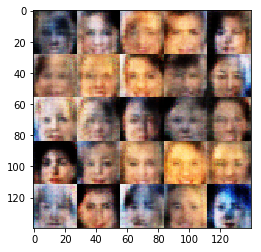

Epoch 1/1... Discriminator Loss: 1.3379... Generator Loss: 2.6039
Epoch 1/1... Discriminator Loss: 1.6674... Generator Loss: 0.8240
Epoch 1/1... Discriminator Loss: 1.2195... Generator Loss: 2.6559
Epoch 1/1... Discriminator Loss: 1.7966... Generator Loss: 2.4702
Epoch 1/1... Discriminator Loss: 0.8114... Generator Loss: 3.1962
Epoch 1/1... Discriminator Loss: 0.6968... Generator Loss: 2.0187
Epoch 1/1... Discriminator Loss: 0.9621... Generator Loss: 1.3117
Epoch 1/1... Discriminator Loss: 1.6709... Generator Loss: 3.2372
Epoch 1/1... Discriminator Loss: 0.9532... Generator Loss: 2.4724
Epoch 1/1... Discriminator Loss: 0.5042... Generator Loss: 2.6771
Epoch 1/1... Discriminator Loss: 0.9910... Generator Loss: 2.6271
Epoch 1/1... Discriminator Loss: 0.5665... Generator Loss: 3.1599
Epoch 1/1... Discriminator Loss: 0.7029... Generator Loss: 2.5661
Epoch 1/1... Discriminator Loss: 0.9556... Generator Loss: 2.5955
Epoch 1/1... Discriminator Loss: 0.8917... Generator Loss: 4.5947
Epoch 1/1.

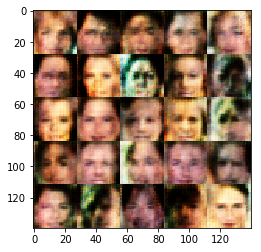

Epoch 1/1... Discriminator Loss: 0.6457... Generator Loss: 3.9720
Epoch 1/1... Discriminator Loss: 0.4373... Generator Loss: 2.8573
Epoch 1/1... Discriminator Loss: 0.4915... Generator Loss: 2.8802
Epoch 1/1... Discriminator Loss: 0.9108... Generator Loss: 2.5116
Epoch 1/1... Discriminator Loss: 0.3963... Generator Loss: 4.2825
Epoch 1/1... Discriminator Loss: 0.4837... Generator Loss: 2.9110
Epoch 1/1... Discriminator Loss: 0.4513... Generator Loss: 2.8767
Epoch 1/1... Discriminator Loss: 0.5682... Generator Loss: 3.1448
Epoch 1/1... Discriminator Loss: 0.5091... Generator Loss: 3.0472
Epoch 1/1... Discriminator Loss: 0.5749... Generator Loss: 2.7374
Epoch 1/1... Discriminator Loss: 0.4191... Generator Loss: 3.7459
Epoch 1/1... Discriminator Loss: 0.4600... Generator Loss: 2.8787
Epoch 1/1... Discriminator Loss: 0.5448... Generator Loss: 3.0599
Epoch 1/1... Discriminator Loss: 0.4140... Generator Loss: 3.9683
Epoch 1/1... Discriminator Loss: 0.3982... Generator Loss: 3.6213
Epoch 1/1.

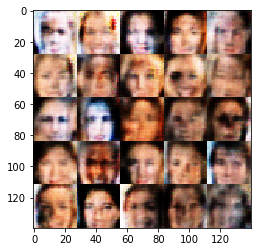

Epoch 1/1... Discriminator Loss: 0.3743... Generator Loss: 4.1103
Epoch 1/1... Discriminator Loss: 0.6616... Generator Loss: 3.1589
Epoch 1/1... Discriminator Loss: 0.3709... Generator Loss: 5.8399
Epoch 1/1... Discriminator Loss: 0.4856... Generator Loss: 4.2829
Epoch 1/1... Discriminator Loss: 0.4144... Generator Loss: 3.1766
Epoch 1/1... Discriminator Loss: 0.4522... Generator Loss: 3.0344
Epoch 1/1... Discriminator Loss: 0.5388... Generator Loss: 3.2993
Epoch 1/1... Discriminator Loss: 0.5373... Generator Loss: 4.1497
Epoch 1/1... Discriminator Loss: 0.4802... Generator Loss: 3.4608
Epoch 1/1... Discriminator Loss: 0.6327... Generator Loss: 3.3907
Epoch 1/1... Discriminator Loss: 0.4703... Generator Loss: 3.1901
Epoch 1/1... Discriminator Loss: 0.4245... Generator Loss: 4.1783
Epoch 1/1... Discriminator Loss: 0.8465... Generator Loss: 3.6345
Epoch 1/1... Discriminator Loss: 0.6023... Generator Loss: 4.5572
Epoch 1/1... Discriminator Loss: 0.8141... Generator Loss: 1.4796
Epoch 1/1.

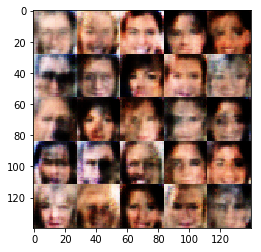

Epoch 1/1... Discriminator Loss: 1.8447... Generator Loss: 2.1540
Epoch 1/1... Discriminator Loss: 0.6083... Generator Loss: 2.6085
Epoch 1/1... Discriminator Loss: 1.0704... Generator Loss: 5.9419
Epoch 1/1... Discriminator Loss: 2.5206... Generator Loss: 2.5809
Epoch 1/1... Discriminator Loss: 0.6149... Generator Loss: 3.2379
Epoch 1/1... Discriminator Loss: 0.8716... Generator Loss: 2.8520
Epoch 1/1... Discriminator Loss: 0.6905... Generator Loss: 3.3396
Epoch 1/1... Discriminator Loss: 1.2422... Generator Loss: 3.0146
Epoch 1/1... Discriminator Loss: 0.7807... Generator Loss: 4.3577
Epoch 1/1... Discriminator Loss: 1.7539... Generator Loss: 2.6773
Epoch 1/1... Discriminator Loss: 1.8710... Generator Loss: 5.0009
Epoch 1/1... Discriminator Loss: 0.8107... Generator Loss: 3.6527
Epoch 1/1... Discriminator Loss: 0.8040... Generator Loss: 2.2004
Epoch 1/1... Discriminator Loss: 0.9841... Generator Loss: 4.0625
Epoch 1/1... Discriminator Loss: 1.1043... Generator Loss: 1.4146
Epoch 1/1.

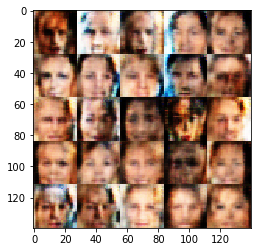

Epoch 1/1... Discriminator Loss: 0.7581... Generator Loss: 1.7599
Epoch 1/1... Discriminator Loss: 0.9118... Generator Loss: 3.1542
Epoch 1/1... Discriminator Loss: 1.1801... Generator Loss: 1.4822
Epoch 1/1... Discriminator Loss: 1.0064... Generator Loss: 3.1871
Epoch 1/1... Discriminator Loss: 0.7113... Generator Loss: 3.2110
Epoch 1/1... Discriminator Loss: 0.7242... Generator Loss: 2.7833
Epoch 1/1... Discriminator Loss: 0.4489... Generator Loss: 3.6386
Epoch 1/1... Discriminator Loss: 0.4900... Generator Loss: 3.3151
Epoch 1/1... Discriminator Loss: 0.6384... Generator Loss: 3.0423
Epoch 1/1... Discriminator Loss: 0.5093... Generator Loss: 4.0679
Epoch 1/1... Discriminator Loss: 0.9836... Generator Loss: 3.5189
Epoch 1/1... Discriminator Loss: 0.7557... Generator Loss: 1.1573
Epoch 1/1... Discriminator Loss: 2.2476... Generator Loss: 4.1916
Epoch 1/1... Discriminator Loss: 2.1035... Generator Loss: 2.1902
Epoch 1/1... Discriminator Loss: 1.6529... Generator Loss: 0.7335
Epoch 1/1.

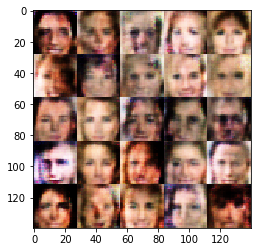

Epoch 1/1... Discriminator Loss: 0.6222... Generator Loss: 3.0717
Epoch 1/1... Discriminator Loss: 0.6964... Generator Loss: 4.4744
Epoch 1/1... Discriminator Loss: 0.4731... Generator Loss: 3.2546
Epoch 1/1... Discriminator Loss: 0.7824... Generator Loss: 3.6869
Epoch 1/1... Discriminator Loss: 0.8564... Generator Loss: 3.7532
Epoch 1/1... Discriminator Loss: 0.6984... Generator Loss: 1.6633
Epoch 1/1... Discriminator Loss: 1.2400... Generator Loss: 4.3756
Epoch 1/1... Discriminator Loss: 1.4368... Generator Loss: 2.5945
Epoch 1/1... Discriminator Loss: 0.9482... Generator Loss: 3.8743
Epoch 1/1... Discriminator Loss: 1.3513... Generator Loss: 2.4884
Epoch 1/1... Discriminator Loss: 0.8238... Generator Loss: 4.0118
Epoch 1/1... Discriminator Loss: 1.8075... Generator Loss: 2.1487
Epoch 1/1... Discriminator Loss: 1.2787... Generator Loss: 4.4164
Epoch 1/1... Discriminator Loss: 0.8021... Generator Loss: 3.2964
Epoch 1/1... Discriminator Loss: 0.5681... Generator Loss: 2.9126
Epoch 1/1.

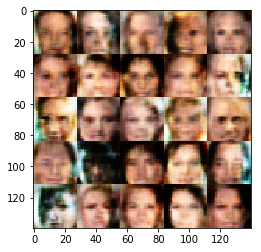

Epoch 1/1... Discriminator Loss: 0.4265... Generator Loss: 3.2390
Epoch 1/1... Discriminator Loss: 0.3646... Generator Loss: 4.4972
Epoch 1/1... Discriminator Loss: 0.4306... Generator Loss: 3.6019
Epoch 1/1... Discriminator Loss: 0.3768... Generator Loss: 4.7249
Epoch 1/1... Discriminator Loss: 0.3876... Generator Loss: 3.7255
Epoch 1/1... Discriminator Loss: 0.3580... Generator Loss: 4.3929
Epoch 1/1... Discriminator Loss: 0.3971... Generator Loss: 3.6756
Epoch 1/1... Discriminator Loss: 0.3904... Generator Loss: 4.6916
Epoch 1/1... Discriminator Loss: 0.3820... Generator Loss: 3.9792
Epoch 1/1... Discriminator Loss: 0.5003... Generator Loss: 4.0312
Epoch 1/1... Discriminator Loss: 0.4312... Generator Loss: 2.8929
Epoch 1/1... Discriminator Loss: 0.5088... Generator Loss: 3.6430
Epoch 1/1... Discriminator Loss: 0.4410... Generator Loss: 4.3658
Epoch 1/1... Discriminator Loss: 0.4685... Generator Loss: 6.2387
Epoch 1/1... Discriminator Loss: 0.5083... Generator Loss: 2.3578
Epoch 1/1.

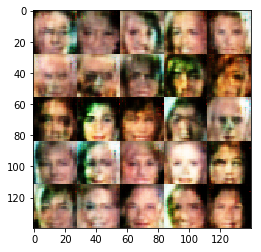

Epoch 1/1... Discriminator Loss: 0.4752... Generator Loss: 3.8091
Epoch 1/1... Discriminator Loss: 0.4518... Generator Loss: 4.7588
Epoch 1/1... Discriminator Loss: 0.4919... Generator Loss: 3.7071
Epoch 1/1... Discriminator Loss: 0.4358... Generator Loss: 3.7947
Epoch 1/1... Discriminator Loss: 0.3907... Generator Loss: 3.7280
Epoch 1/1... Discriminator Loss: 0.6604... Generator Loss: 3.5034
Epoch 1/1... Discriminator Loss: 0.3745... Generator Loss: 5.1260
Epoch 1/1... Discriminator Loss: 0.5970... Generator Loss: 3.0317
Epoch 1/1... Discriminator Loss: 0.5497... Generator Loss: 2.7474
Epoch 1/1... Discriminator Loss: 0.3831... Generator Loss: 4.6766
Epoch 1/1... Discriminator Loss: 0.6897... Generator Loss: 4.1205
Epoch 1/1... Discriminator Loss: 0.4693... Generator Loss: 6.7228
Epoch 1/1... Discriminator Loss: 0.3689... Generator Loss: 4.9905
Epoch 1/1... Discriminator Loss: 0.4657... Generator Loss: 3.1459
Epoch 1/1... Discriminator Loss: 0.3851... Generator Loss: 4.5740
Epoch 1/1.

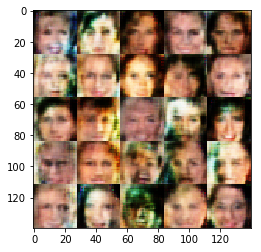

Epoch 1/1... Discriminator Loss: 0.6910... Generator Loss: 5.1158
Epoch 1/1... Discriminator Loss: 0.5563... Generator Loss: 2.6920
Epoch 1/1... Discriminator Loss: 0.7040... Generator Loss: 3.9678
Epoch 1/1... Discriminator Loss: 0.5569... Generator Loss: 3.9748
Epoch 1/1... Discriminator Loss: 0.4668... Generator Loss: 4.1054
Epoch 1/1... Discriminator Loss: 0.7349... Generator Loss: 5.6315
Epoch 1/1... Discriminator Loss: 1.9626... Generator Loss: 3.9773
Epoch 1/1... Discriminator Loss: 0.4715... Generator Loss: 3.4975
Epoch 1/1... Discriminator Loss: 1.1581... Generator Loss: 0.7745
Epoch 1/1... Discriminator Loss: 1.7349... Generator Loss: 5.8391
Epoch 1/1... Discriminator Loss: 2.7262... Generator Loss: 1.9531
Epoch 1/1... Discriminator Loss: 0.9670... Generator Loss: 1.1552
Epoch 1/1... Discriminator Loss: 1.0108... Generator Loss: 3.1326
Epoch 1/1... Discriminator Loss: 1.1174... Generator Loss: 1.2816
Epoch 1/1... Discriminator Loss: 1.5241... Generator Loss: 2.6231
Epoch 1/1.

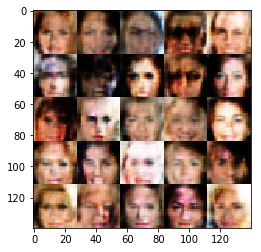

Epoch 1/1... Discriminator Loss: 0.9439... Generator Loss: 3.7740
Epoch 1/1... Discriminator Loss: 0.7191... Generator Loss: 3.1277
Epoch 1/1... Discriminator Loss: 0.8259... Generator Loss: 2.2785
Epoch 1/1... Discriminator Loss: 0.6535... Generator Loss: 1.7696
Epoch 1/1... Discriminator Loss: 0.8067... Generator Loss: 3.9915
Epoch 1/1... Discriminator Loss: 0.8604... Generator Loss: 3.2780
Epoch 1/1... Discriminator Loss: 0.4686... Generator Loss: 3.3933
Epoch 1/1... Discriminator Loss: 0.6158... Generator Loss: 1.9657
Epoch 1/1... Discriminator Loss: 1.3695... Generator Loss: 6.2660
Epoch 1/1... Discriminator Loss: 2.4598... Generator Loss: 1.4417
Epoch 1/1... Discriminator Loss: 1.3253... Generator Loss: 5.9007
Epoch 1/1... Discriminator Loss: 2.9620... Generator Loss: 1.5327
Epoch 1/1... Discriminator Loss: 1.2469... Generator Loss: 2.4428
Epoch 1/1... Discriminator Loss: 0.8677... Generator Loss: 3.1977
Epoch 1/1... Discriminator Loss: 1.2665... Generator Loss: 2.7187
Epoch 1/1.

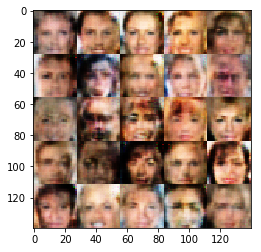

Epoch 1/1... Discriminator Loss: 0.5881... Generator Loss: 3.0589
Epoch 1/1... Discriminator Loss: 0.5582... Generator Loss: 3.0360
Epoch 1/1... Discriminator Loss: 0.5474... Generator Loss: 2.7921
Epoch 1/1... Discriminator Loss: 0.6658... Generator Loss: 1.8078
Epoch 1/1... Discriminator Loss: 0.7845... Generator Loss: 4.1650
Epoch 1/1... Discriminator Loss: 0.4149... Generator Loss: 5.1019
Epoch 1/1... Discriminator Loss: 0.6369... Generator Loss: 2.7177
Epoch 1/1... Discriminator Loss: 0.4314... Generator Loss: 3.3486
Epoch 1/1... Discriminator Loss: 0.7294... Generator Loss: 4.1587
Epoch 1/1... Discriminator Loss: 0.7314... Generator Loss: 3.1941
Epoch 1/1... Discriminator Loss: 0.6815... Generator Loss: 4.2655
Epoch 1/1... Discriminator Loss: 1.3650... Generator Loss: 0.6591
Epoch 1/1... Discriminator Loss: 1.1753... Generator Loss: 4.5756
Epoch 1/1... Discriminator Loss: 0.7345... Generator Loss: 3.0774
Epoch 1/1... Discriminator Loss: 0.9138... Generator Loss: 2.1543
Epoch 1/1.

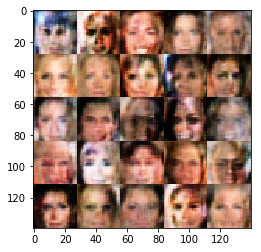

Epoch 1/1... Discriminator Loss: 0.3696... Generator Loss: 5.2370
Epoch 1/1... Discriminator Loss: 0.4388... Generator Loss: 3.1159
Epoch 1/1... Discriminator Loss: 0.4506... Generator Loss: 4.0511
Epoch 1/1... Discriminator Loss: 0.4644... Generator Loss: 3.2871
Epoch 1/1... Discriminator Loss: 0.4003... Generator Loss: 4.0750
Epoch 1/1... Discriminator Loss: 0.4538... Generator Loss: 4.2577
Epoch 1/1... Discriminator Loss: 0.5244... Generator Loss: 3.2612
Epoch 1/1... Discriminator Loss: 0.6306... Generator Loss: 4.4428
Epoch 1/1... Discriminator Loss: 0.4617... Generator Loss: 2.9503
Epoch 1/1... Discriminator Loss: 0.5218... Generator Loss: 3.0347
Epoch 1/1... Discriminator Loss: 0.9644... Generator Loss: 4.8848
Epoch 1/1... Discriminator Loss: 1.0646... Generator Loss: 4.2520
Epoch 1/1... Discriminator Loss: 0.7166... Generator Loss: 1.8123
Epoch 1/1... Discriminator Loss: 0.7619... Generator Loss: 3.4536
Epoch 1/1... Discriminator Loss: 0.7860... Generator Loss: 2.1259
Epoch 1/1.

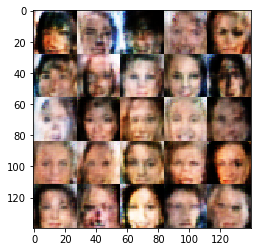

Epoch 1/1... Discriminator Loss: 0.4699... Generator Loss: 3.5263
Epoch 1/1... Discriminator Loss: 0.3860... Generator Loss: 4.7133
Epoch 1/1... Discriminator Loss: 0.5319... Generator Loss: 4.3983
Epoch 1/1... Discriminator Loss: 0.5099... Generator Loss: 3.7642
Epoch 1/1... Discriminator Loss: 0.5222... Generator Loss: 3.8678
Epoch 1/1... Discriminator Loss: 0.4186... Generator Loss: 3.0230
Epoch 1/1... Discriminator Loss: 0.4314... Generator Loss: 3.4674
Epoch 1/1... Discriminator Loss: 0.3627... Generator Loss: 4.4082
Epoch 1/1... Discriminator Loss: 0.5113... Generator Loss: 3.0120
Epoch 1/1... Discriminator Loss: 0.4559... Generator Loss: 4.3957
Epoch 1/1... Discriminator Loss: 0.3611... Generator Loss: 5.1844
Epoch 1/1... Discriminator Loss: 0.5925... Generator Loss: 3.2518
Epoch 1/1... Discriminator Loss: 0.4321... Generator Loss: 3.3126
Epoch 1/1... Discriminator Loss: 0.3541... Generator Loss: 5.4890
Epoch 1/1... Discriminator Loss: 0.3833... Generator Loss: 3.8607
Epoch 1/1.

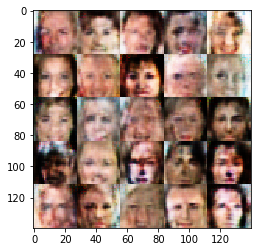

Epoch 1/1... Discriminator Loss: 0.4152... Generator Loss: 5.3251
Epoch 1/1... Discriminator Loss: 0.4973... Generator Loss: 3.8303
Epoch 1/1... Discriminator Loss: 0.3651... Generator Loss: 6.1285
Epoch 1/1... Discriminator Loss: 0.4491... Generator Loss: 4.0172
Epoch 1/1... Discriminator Loss: 0.3780... Generator Loss: 4.6021
Epoch 1/1... Discriminator Loss: 0.5678... Generator Loss: 4.2967
Epoch 1/1... Discriminator Loss: 0.4816... Generator Loss: 6.6384
Epoch 1/1... Discriminator Loss: 0.3630... Generator Loss: 5.5765
Epoch 1/1... Discriminator Loss: 0.3851... Generator Loss: 3.9840
Epoch 1/1... Discriminator Loss: 0.4495... Generator Loss: 3.3372
Epoch 1/1... Discriminator Loss: 0.3745... Generator Loss: 4.5960
Epoch 1/1... Discriminator Loss: 0.5235... Generator Loss: 3.0185
Epoch 1/1... Discriminator Loss: 0.5574... Generator Loss: 4.6249
Epoch 1/1... Discriminator Loss: 1.3959... Generator Loss: 2.0356
Epoch 1/1... Discriminator Loss: 0.7459... Generator Loss: 4.4263
Epoch 1/1.

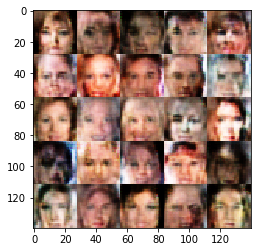

Epoch 1/1... Discriminator Loss: 0.5746... Generator Loss: 4.7222
Epoch 1/1... Discriminator Loss: 0.6428... Generator Loss: 2.6240
Epoch 1/1... Discriminator Loss: 1.1426... Generator Loss: 4.8641
Epoch 1/1... Discriminator Loss: 1.5541... Generator Loss: 2.8421
Epoch 1/1... Discriminator Loss: 0.5185... Generator Loss: 4.0554
Epoch 1/1... Discriminator Loss: 0.5664... Generator Loss: 2.6938
Epoch 1/1... Discriminator Loss: 0.8888... Generator Loss: 1.5530
Epoch 1/1... Discriminator Loss: 1.3976... Generator Loss: 4.6262
Epoch 1/1... Discriminator Loss: 1.1559... Generator Loss: 2.0697
Epoch 1/1... Discriminator Loss: 0.7548... Generator Loss: 2.6621
Epoch 1/1... Discriminator Loss: 0.6780... Generator Loss: 2.8130
Epoch 1/1... Discriminator Loss: 0.6283... Generator Loss: 3.9159
Epoch 1/1... Discriminator Loss: 0.4913... Generator Loss: 3.8384
Epoch 1/1... Discriminator Loss: 0.4651... Generator Loss: 3.5780
Epoch 1/1... Discriminator Loss: 0.4331... Generator Loss: 3.3774
Epoch 1/1.

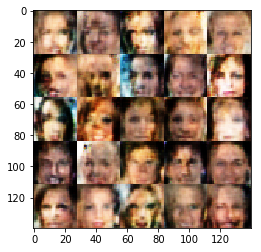

Epoch 1/1... Discriminator Loss: 0.6298... Generator Loss: 4.2327
Epoch 1/1... Discriminator Loss: 0.4476... Generator Loss: 3.7118
Epoch 1/1... Discriminator Loss: 0.7045... Generator Loss: 3.8870
Epoch 1/1... Discriminator Loss: 0.4808... Generator Loss: 4.0182
Epoch 1/1... Discriminator Loss: 0.3981... Generator Loss: 4.9256
Epoch 1/1... Discriminator Loss: 0.4730... Generator Loss: 2.8267
Epoch 1/1... Discriminator Loss: 0.4343... Generator Loss: 3.9676
Epoch 1/1... Discriminator Loss: 0.4489... Generator Loss: 3.8382
Epoch 1/1... Discriminator Loss: 0.6704... Generator Loss: 4.7518
Epoch 1/1... Discriminator Loss: 0.9990... Generator Loss: 3.7507
Epoch 1/1... Discriminator Loss: 0.5744... Generator Loss: 3.4691
Epoch 1/1... Discriminator Loss: 1.2241... Generator Loss: 1.2630
Epoch 1/1... Discriminator Loss: 1.6794... Generator Loss: 5.5990
Epoch 1/1... Discriminator Loss: 1.8456... Generator Loss: 1.8065
Epoch 1/1... Discriminator Loss: 0.8134... Generator Loss: 2.2376
Epoch 1/1.

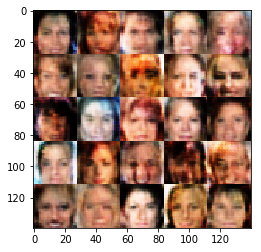

Epoch 1/1... Discriminator Loss: 0.6433... Generator Loss: 3.4284
Epoch 1/1... Discriminator Loss: 0.4975... Generator Loss: 3.3165
Epoch 1/1... Discriminator Loss: 0.5202... Generator Loss: 3.1860
Epoch 1/1... Discriminator Loss: 0.8224... Generator Loss: 3.9934
Epoch 1/1... Discriminator Loss: 0.5913... Generator Loss: 3.3923
Epoch 1/1... Discriminator Loss: 0.3472... Generator Loss: 6.8110
Epoch 1/1... Discriminator Loss: 0.4261... Generator Loss: 4.4215
Epoch 1/1... Discriminator Loss: 0.4223... Generator Loss: 4.5765
Epoch 1/1... Discriminator Loss: 0.3831... Generator Loss: 4.1445
Epoch 1/1... Discriminator Loss: 0.6713... Generator Loss: 3.2556
Epoch 1/1... Discriminator Loss: 0.6400... Generator Loss: 3.7075
Epoch 1/1... Discriminator Loss: 0.5345... Generator Loss: 2.9421
Epoch 1/1... Discriminator Loss: 0.4315... Generator Loss: 3.3374
Epoch 1/1... Discriminator Loss: 0.3599... Generator Loss: 5.0173
Epoch 1/1... Discriminator Loss: 0.4486... Generator Loss: 3.2692
Epoch 1/1.

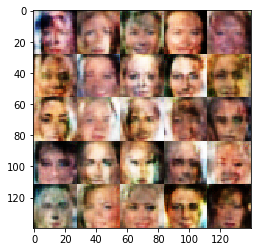

Epoch 1/1... Discriminator Loss: 0.3500... Generator Loss: 5.8384
Epoch 1/1... Discriminator Loss: 0.4707... Generator Loss: 2.4258
Epoch 1/1... Discriminator Loss: 0.4164... Generator Loss: 4.0956
Epoch 1/1... Discriminator Loss: 0.5620... Generator Loss: 4.1835
Epoch 1/1... Discriminator Loss: 1.0935... Generator Loss: 1.1588
Epoch 1/1... Discriminator Loss: 0.8403... Generator Loss: 5.3722
Epoch 1/1... Discriminator Loss: 2.0510... Generator Loss: 1.2267
Epoch 1/1... Discriminator Loss: 1.2998... Generator Loss: 4.7064
Epoch 1/1... Discriminator Loss: 1.5293... Generator Loss: 2.1831
Epoch 1/1... Discriminator Loss: 1.1658... Generator Loss: 2.5157
Epoch 1/1... Discriminator Loss: 0.7839... Generator Loss: 2.6451
Epoch 1/1... Discriminator Loss: 0.9183... Generator Loss: 1.6293
Epoch 1/1... Discriminator Loss: 0.8242... Generator Loss: 2.2838
Epoch 1/1... Discriminator Loss: 0.7446... Generator Loss: 2.8967
Epoch 1/1... Discriminator Loss: 0.8891... Generator Loss: 1.6553
Epoch 1/1.

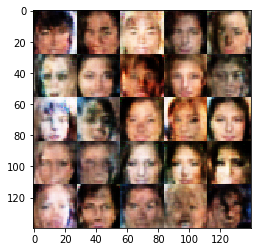

Epoch 1/1... Discriminator Loss: 0.4160... Generator Loss: 3.6002
Epoch 1/1... Discriminator Loss: 0.3817... Generator Loss: 4.1292
Epoch 1/1... Discriminator Loss: 0.3494... Generator Loss: 5.2350
Epoch 1/1... Discriminator Loss: 0.4803... Generator Loss: 3.2113
Epoch 1/1... Discriminator Loss: 0.3759... Generator Loss: 4.3065
Epoch 1/1... Discriminator Loss: 0.7414... Generator Loss: 2.7934
Epoch 1/1... Discriminator Loss: 0.6486... Generator Loss: 4.9465
Epoch 1/1... Discriminator Loss: 0.4290... Generator Loss: 3.2792
Epoch 1/1... Discriminator Loss: 0.5288... Generator Loss: 2.9686
Epoch 1/1... Discriminator Loss: 0.7426... Generator Loss: 1.7309
Epoch 1/1... Discriminator Loss: 1.0259... Generator Loss: 5.7988
Epoch 1/1... Discriminator Loss: 2.2453... Generator Loss: 2.8429
Epoch 1/1... Discriminator Loss: 0.9608... Generator Loss: 4.8435
Epoch 1/1... Discriminator Loss: 0.8873... Generator Loss: 2.2025
Epoch 1/1... Discriminator Loss: 0.6664... Generator Loss: 3.5725
Epoch 1/1.

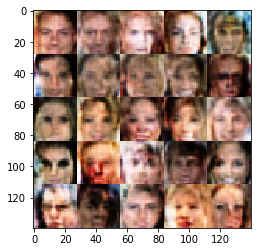

Epoch 1/1... Discriminator Loss: 1.2207... Generator Loss: 1.7567
Epoch 1/1... Discriminator Loss: 1.5441... Generator Loss: 3.8606
Epoch 1/1... Discriminator Loss: 0.9420... Generator Loss: 2.8358
Epoch 1/1... Discriminator Loss: 0.7073... Generator Loss: 2.0029
Epoch 1/1... Discriminator Loss: 0.7356... Generator Loss: 2.4389
Epoch 1/1... Discriminator Loss: 0.6858... Generator Loss: 2.4019
Epoch 1/1... Discriminator Loss: 0.4807... Generator Loss: 3.2589
Epoch 1/1... Discriminator Loss: 0.7578... Generator Loss: 3.8626
Epoch 1/1... Discriminator Loss: 0.4461... Generator Loss: 4.9276
Epoch 1/1... Discriminator Loss: 0.6516... Generator Loss: 2.4380
Epoch 1/1... Discriminator Loss: 0.6975... Generator Loss: 3.1202
Epoch 1/1... Discriminator Loss: 0.4158... Generator Loss: 4.4576
Epoch 1/1... Discriminator Loss: 0.6080... Generator Loss: 2.9891
Epoch 1/1... Discriminator Loss: 0.3755... Generator Loss: 4.8313
Epoch 1/1... Discriminator Loss: 0.6764... Generator Loss: 2.3801
Epoch 1/1.

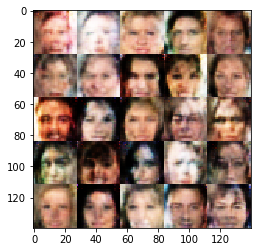

Epoch 1/1... Discriminator Loss: 0.4788... Generator Loss: 3.4869
Epoch 1/1... Discriminator Loss: 0.4617... Generator Loss: 3.6850
Epoch 1/1... Discriminator Loss: 0.4762... Generator Loss: 3.1718
Epoch 1/1... Discriminator Loss: 0.4878... Generator Loss: 3.3352
Epoch 1/1... Discriminator Loss: 0.4524... Generator Loss: 3.6503
Epoch 1/1... Discriminator Loss: 0.4290... Generator Loss: 4.3508
Epoch 1/1... Discriminator Loss: 0.3915... Generator Loss: 3.7693
Epoch 1/1... Discriminator Loss: 0.5969... Generator Loss: 4.1027
Epoch 1/1... Discriminator Loss: 0.4754... Generator Loss: 4.3223
Epoch 1/1... Discriminator Loss: 0.4075... Generator Loss: 3.7639
Epoch 1/1... Discriminator Loss: 0.6828... Generator Loss: 1.9848
Epoch 1/1... Discriminator Loss: 0.6250... Generator Loss: 3.8137
Epoch 1/1... Discriminator Loss: 0.6720... Generator Loss: 2.7229
Epoch 1/1... Discriminator Loss: 0.4498... Generator Loss: 3.6197
Epoch 1/1... Discriminator Loss: 0.6460... Generator Loss: 4.1101
Epoch 1/1.

In [12]:
batch_size = 32
z_dim = 100
learning_rate = 0.0004
beta1 = 0.5
tf.reset_default_graph()

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.